# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, KBinsDiscretizer, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# sumber dataset :  # https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/wildan-wicaksono/Ship-Perfomance/refs/heads/main/Dataset_inisiasi.csv')
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 4.1 Melihat Struktur Data

In [3]:
# menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
# mengecek kolom numerik
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [5]:
# mengecek kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Weather_Condition'],
      dtype='object')

In [6]:
# menampilkan deskripsi dataset
df.describe(include='all')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736,2600,2600,2600,2600,2736.000000,2736.000000,2736.000000,2736.000000,2600,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
unique,57,4,4,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,NaN,NaN,NaN,NaN,Calm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,669,686,892,873,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,17.602863,1757.610939,1036.406203,9.929103,NaN,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,NaN,NaN,NaN,NaN,NaN,4.311979,717.002777,568.632080,2.876423,NaN,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,NaN,NaN,NaN,NaN,NaN,10.009756,501.025220,50.433150,5.001947,NaN,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,NaN,NaN,NaN,NaN,NaN,13.928452,1148.104914,548.511573,7.437485,NaN,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,NaN,NaN,NaN,NaN,NaN,17.713757,1757.494344,1037.816060,9.918965,NaN,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,NaN,NaN,NaN,NaN,NaN,21.284785,2382.594292,1540.934161,12.413149,NaN,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205


Efficiency_nm_per_kWh dan Seasonal_Impact_Score memiliki standar deviasi mendekati 0 (sehingga variansinya semakin mendekati 0 pula). Kolom ini akan dihapus.

### 4.2 Mengecek Missing Values (dan Duplikat)

In [7]:
# mengecek data duplikat
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat

In [8]:
# mengecek missing values
missing_values = df.isna().sum()
missing_values[missing_values > 0]

,0
Ship_Type,136
Route_Type,136
Engine_Type,136
Maintenance_Status,136
Weather_Condition,136


In [9]:
missing_values_prosentase = missing_values[missing_values>0]/len(df) * 100
missing_values_prosentase

,0
Ship_Type,4.97076
Route_Type,4.97076
Engine_Type,4.97076
Maintenance_Status,4.97076
Weather_Condition,4.97076


Semua data yang hilang berada di kolom kategorikal. Data yang hilang akan diisi dengan modus pada kolom masing-masing.

### 4.3 Analisis Distribusi dan Korelasi

Analisis Distribusi

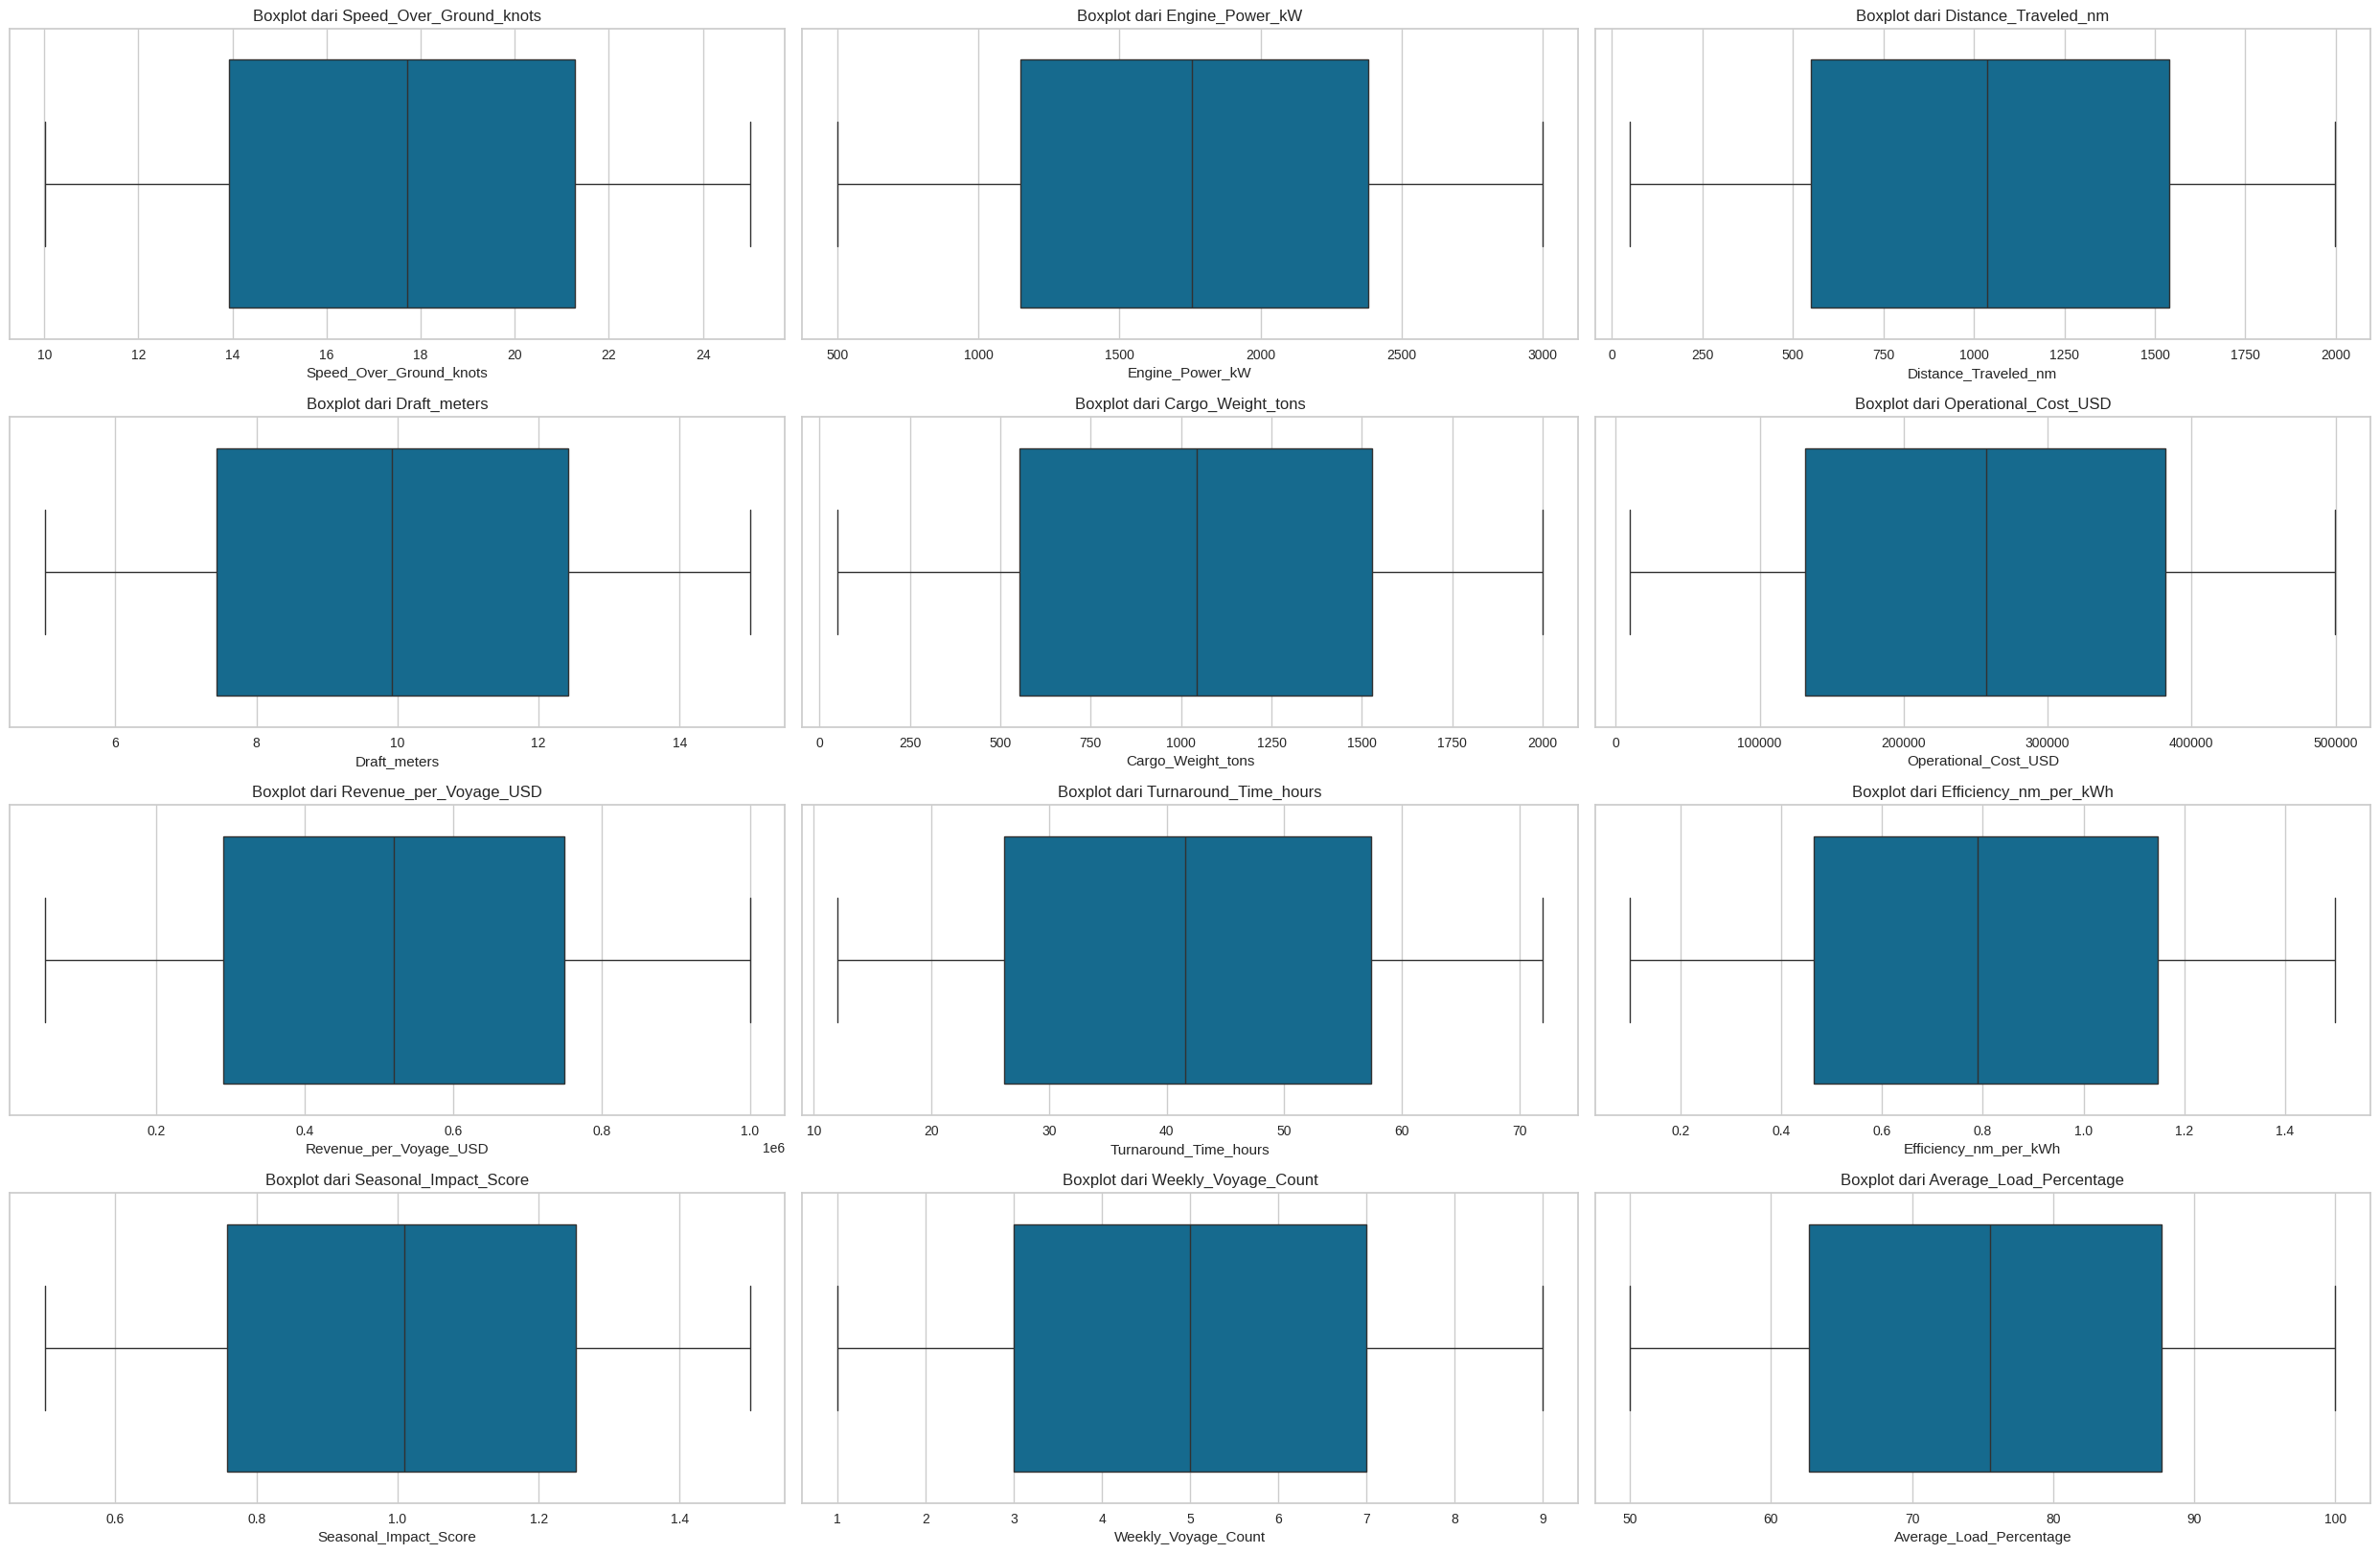

In [10]:
plt.figure(figsize=(25,20))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot dari {feature}')
plt.tight_layout()
plt.show()

Tidak ada outlier.

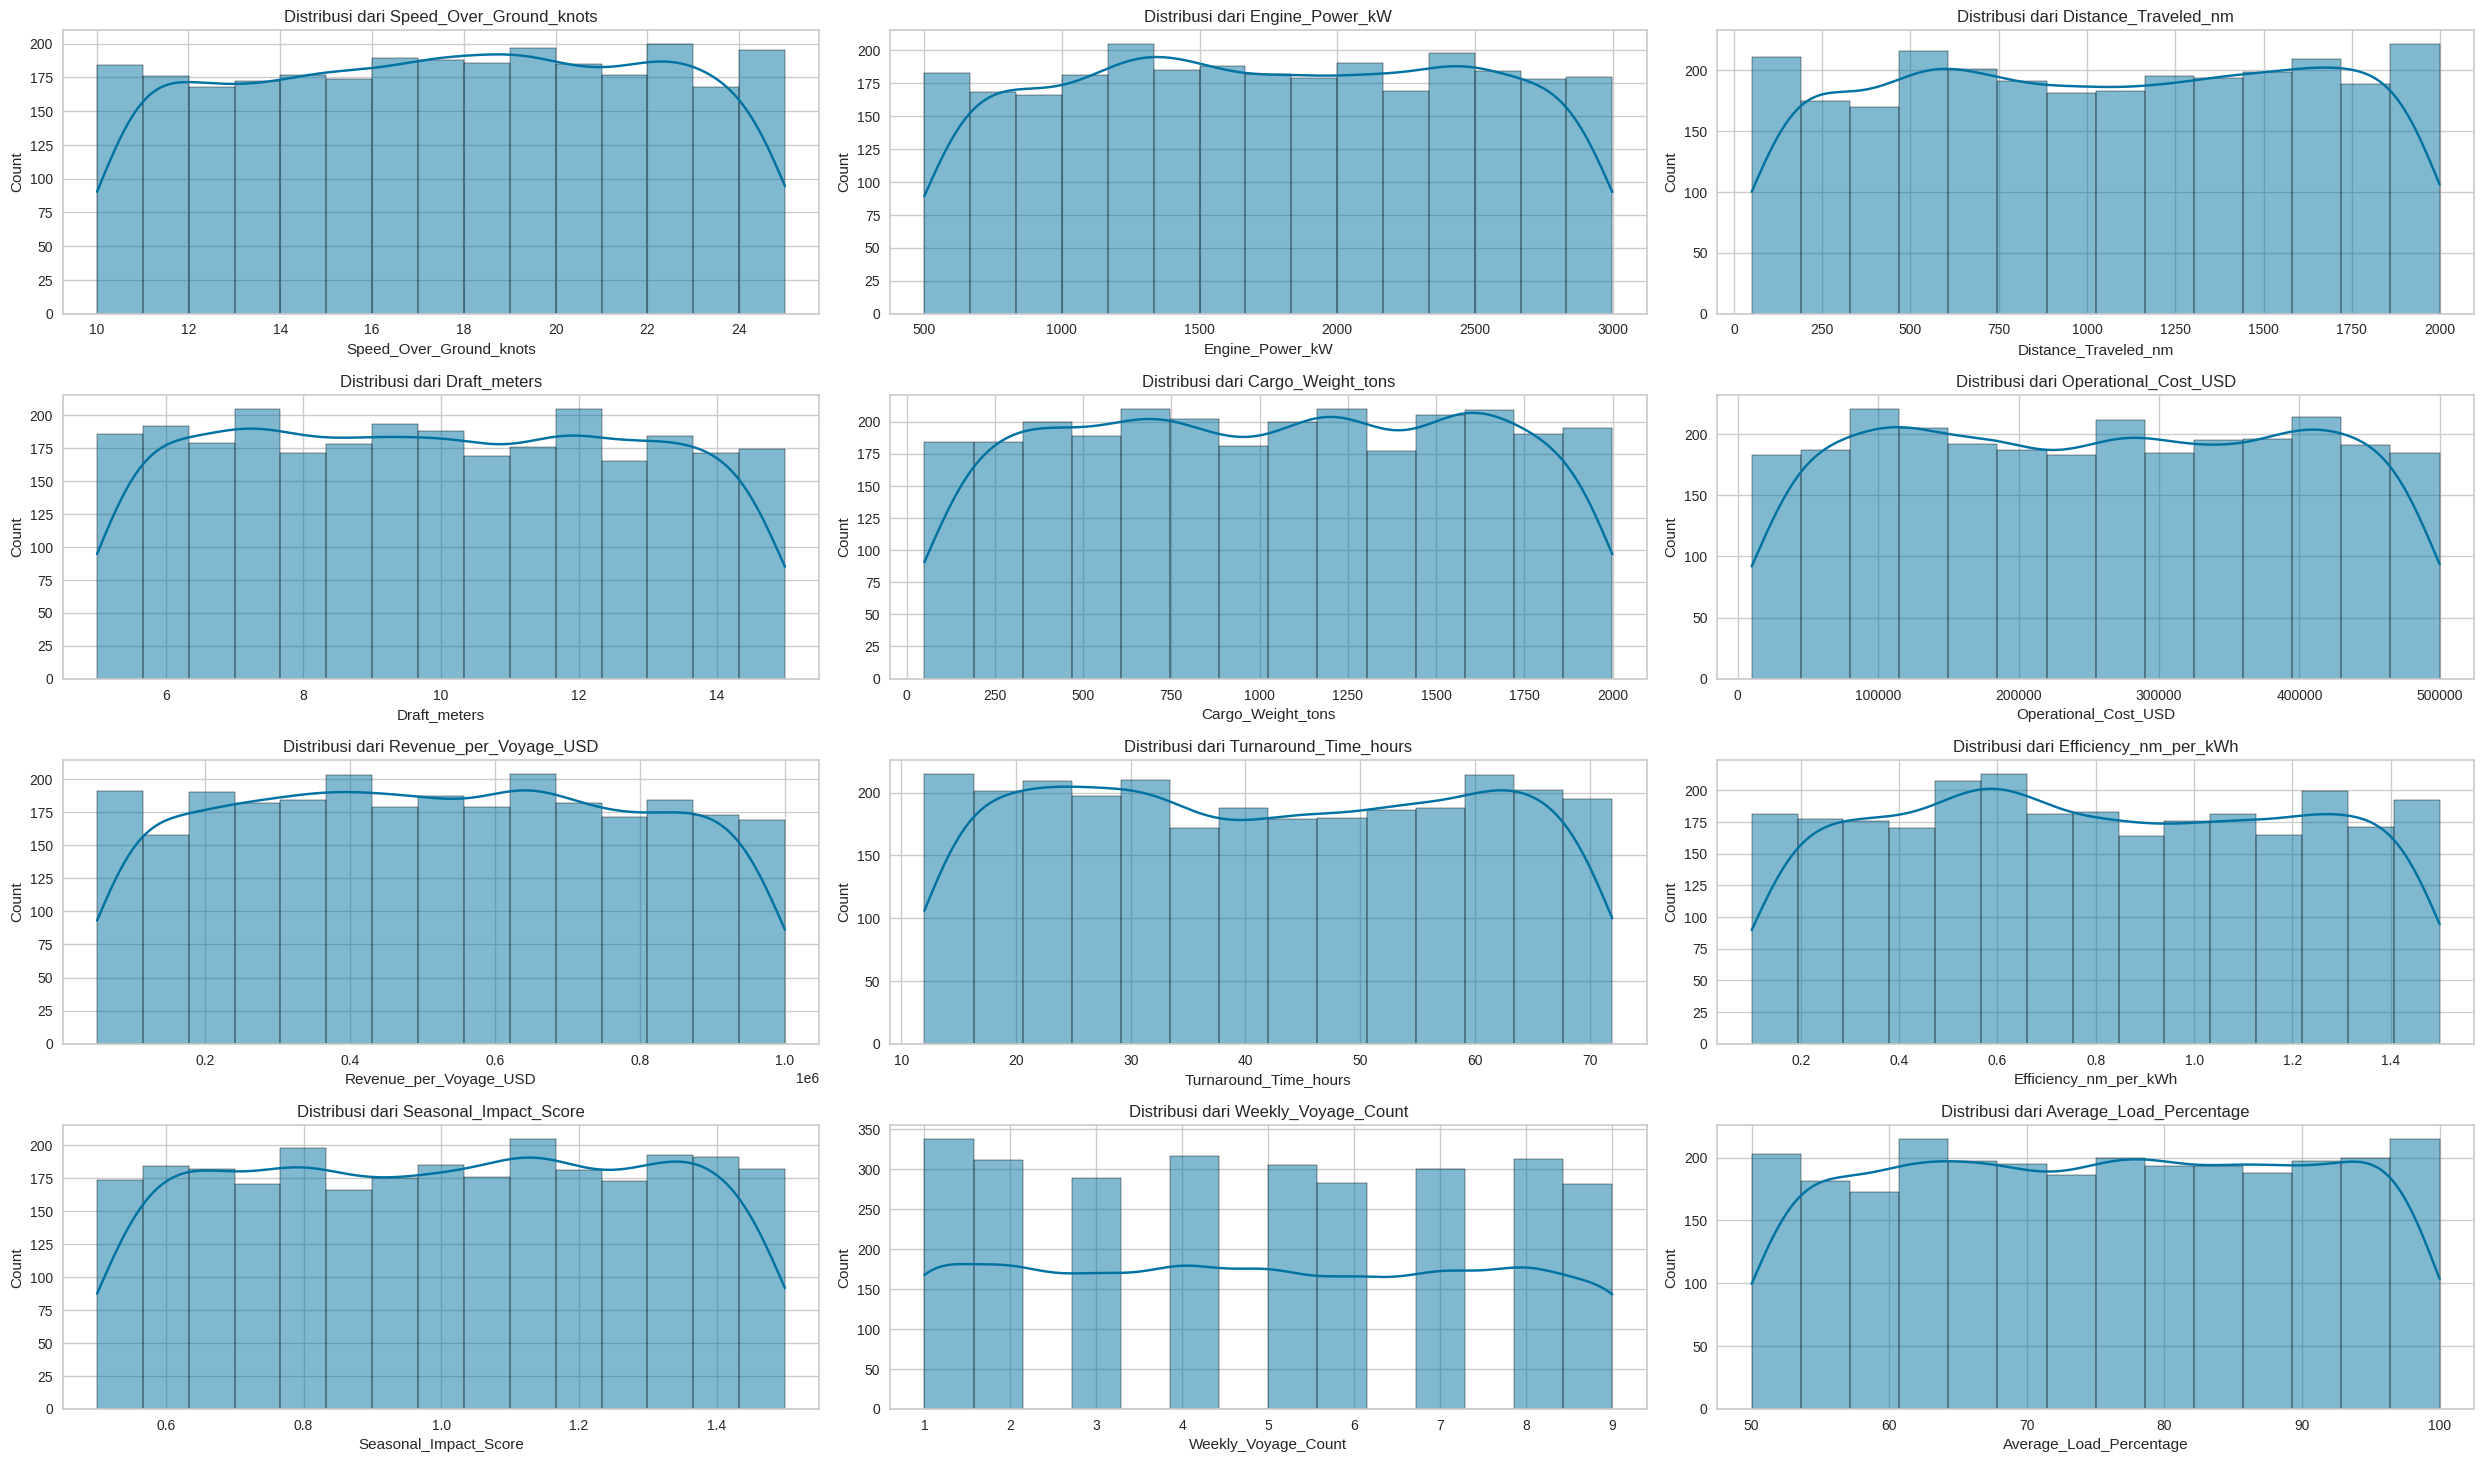

In [11]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.tight_layout()
plt.show()

Distribusi data tidak mengikuti distribusi normal dan rentangnya berbeda, maka diperlukan normalisasi.
- Pada Speed_Over_Ground_knots, distribusi cenderung merata dengan sedikit berkonsentasi di tengah.
- Pada Engine_Power_kW, data berdistribusi merata.
- Pada Distance_Traveled_nm, data berdistribusi seragam.
- Pada Distance_Traveled_nm, data berdistribusi seragam.
- Pada Draft_meters, data berdistribusi seragam.
- Pada Cargo_Weight_ton, data berdistribusi seragam.
- Pada Operational_Cost_USD, data berdistribusi merata.
- Pada Revenue_per_Voyae_USD, data berdistribusi merata.
- Pada Turnarount_Time_hours, data berdistribusi merata.
- Pada Eddiciency_nm_per_kWh, data cenderung merata di antara 0,2 sampai 1,4.
- Pada Seasonal_Impact_Score, data cenderung merata di antara 0,6 hingga 1,4.
- Pada Weekly_Voyage_Count, data berdistribusi merata.
- Pada Average_Load_Percentage, data berdistribusi seragam.

In [12]:
corr_matrix_numeric = df[numeric_features].corr()
corr_matrix_numeric

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Speed_Over_Ground_knots,1.000000,-0.003299,-0.010198,-0.015117,-0.005009,-0.035825,0.002370,-0.005812,0.019273,0.028357,0.019171,-0.021861
Engine_Power_kW,-0.003299,1.000000,-0.009120,0.008133,-0.012654,-0.012260,-0.010947,-0.032442,-0.017918,-0.011767,0.036588,0.023847
Distance_Traveled_nm,-0.010198,-0.009120,1.000000,-0.010686,0.013680,0.002468,0.040388,-0.026672,0.003229,0.016989,0.044302,-0.005230
Draft_meters,-0.015117,0.008133,-0.010686,1.000000,0.006463,0.004111,0.000634,-0.029324,-0.017294,-0.001700,0.012634,-0.011336
Cargo_Weight_tons,-0.005009,-0.012654,0.013680,0.006463,1.000000,-0.036499,0.016556,-0.031743,0.006178,-0.026754,-0.001022,0.026690
Operational_Cost_USD,-0.035825,-0.012260,0.002468,0.004111,-0.036499,1.000000,0.023865,-0.003679,0.003258,0.021142,0.007967,-0.019514
Revenue_per_Voyage_USD,0.002370,-0.010947,0.040388,0.000634,0.016556,0.023865,1.000000,-0.026839,0.016669,0.019510,0.010842,0.008724
Turnaround_Time_hours,-0.005812,-0.032442,-0.026672,-0.029324,-0.031743,-0.003679,-0.026839,1.000000,0.009138,0.009526,-0.012483,0.019615
Efficiency_nm_per_kWh,0.019273,-0.017918,0.003229,-0.017294,0.006178,0.003258,0.016669,0.009138,1.000000,-0.005023,-0.004604,-0.010777
Seasonal_Impact_Score,0.028357,-0.011767,0.016989,-0.001700,-0.026754,0.021142,0.019510,0.009526,-0.005023,1.000000,0.007728,-0.031340


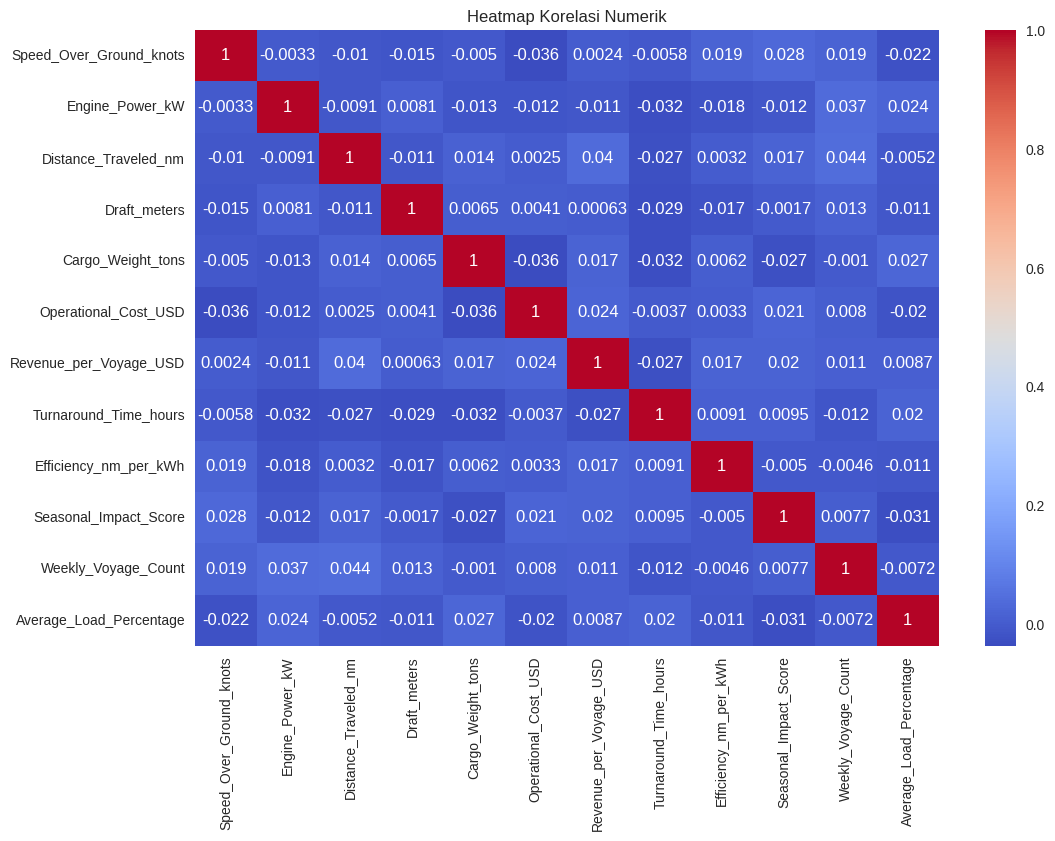

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Numerik')
plt.show()

Korelasi antar kolom numerik hampir 0 sehingga hampir tidak ada hubungan diantara keduanya.

### 4.4 Visualisasi Data

In [14]:
df[categorical_features]

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,Moderate
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,Moderate
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,Moderate
...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,NaN
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,NaN
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate


In [15]:
categorical_features = categorical_features.drop('Date')

<ipython-input-16-39eee30d435f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df, palette='tab10')
<ipython-input-16-39eee30d435f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df, palette='tab10')
<ipython-input-16-39eee30d435f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df, palette='tab10')
<ipython-input-16-39eee30d435f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

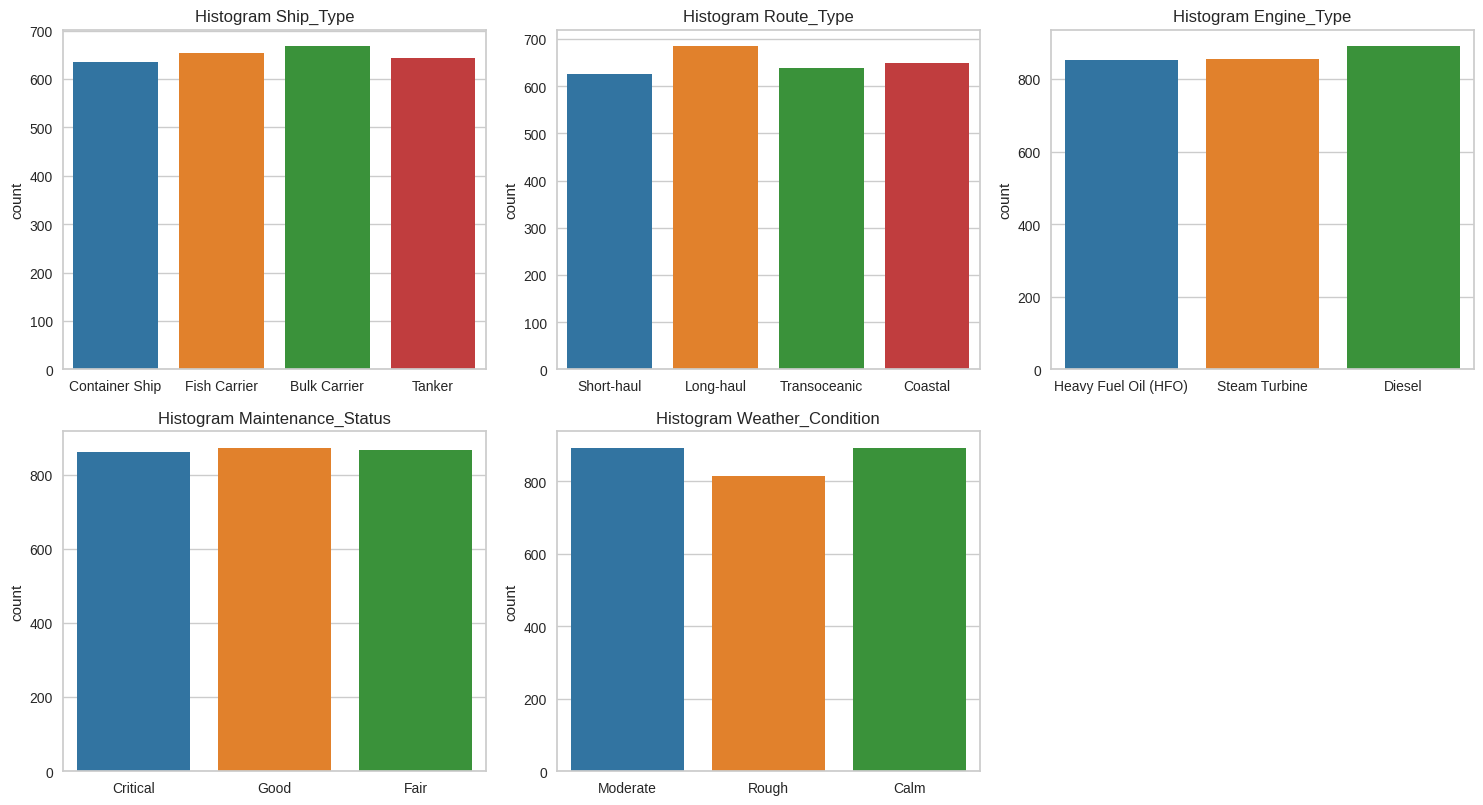

In [16]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')

plt.tight_layout()
plt.show()

- Tidak ada dominasi yang signifikan pada Ship_Type, namun Bulk Carrier menjadi pilihan yang lebih umum.
- Distribusi cukup merata pada Route_Type dengan Long-haul sedikit lebih unggul.
- Pada Engine_Type, Diesel menjadi pilihan yang umum. Untuk dua lainnya memiliki jumlah hampir sama.
- Berdasarkan Maintenance_Status, sebagian besar kapal berada dalam pemeliharaan baik.
- Berdasarkan Weather_Condition, sebagian besar kapal beroperasi dalam cuaca yang tenang.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### 5.1 Menangani Missing Values

Melakukan imputasi dengan modus per kolom yang berkaitan. Jika lebih dari 1 modus, maka cukup dipilih salah satunya.

In [17]:
for feature in categorical_features:
  df[feature] = df[feature].fillna(df[feature].mode()[0])
missing_values = df.isna().sum()
missing_values[missing_values > 0]

,0


Tidak ada data duplikat.

### 5.2 Encoding Data Kategorikal

In [18]:
# drop Date
df = df.drop('Date', axis=1)

Untuk Ship_Type, Engine_Type, dan Route_Type merupakan data nominal dan kategori yang dimiliki per fitur hanya sedikit. Maka encoding menggunakan one-hot-encoding cocok digunakan.

In [19]:
df_encode = pd.get_dummies(df, columns=['Ship_Type', 'Engine_Type', 'Route_Type'])
df_encode = df_encode.replace({True:1, False:0})
df_encode

<ipython-input-19-8310dd924405>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encode = df_encode.replace({True:1, False:0})


,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,Good,13.852798,2161.282358,831.355653,14.612775,Calm,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,Critical,16.813713,1343.608006,1376.460622,9.306518,Calm,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


Untuk Weather_Condition dan Maintenance_Status merupakan kategori ordinal sehingga cocok menggunakan label encoding.

In [20]:
label_encoder = LabelEncoder()
feature_ordinal = ['Weather_Condition', 'Maintenance_Status']

for feature in feature_ordinal:
  df_encode[feature] = label_encoder.fit_transform(df_encode[feature])

df_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,2,13.852798,2161.282358,831.355653,14.612775,0,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,0,16.813713,1343.608006,1376.460622,9.306518,0,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


### 5.3 Normalisasi atau Standarisasi Fitur Numerik

In [21]:
num_encode = df_encode.select_dtypes(include=['number']).columns
num_encode

Index(['Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition',
       'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage', 'Ship_Type_Bulk Carrier',
       'Ship_Type_Container Ship', 'Ship_Type_Fish Carrier',
       'Ship_Type_Tanker', 'Engine_Type_Diesel',
       'Engine_Type_Heavy Fuel Oil (HFO)', 'Engine_Type_Steam Turbine',
       'Route_Type_Coastal', 'Route_Type_Long-haul', 'Route_Type_Short-haul',
       'Route_Type_Transoceanic'],
      dtype='object')

In [22]:
minmax_scale = MinMaxScaler()
df_encode[num_encode] = minmax_scale.fit_transform(df_encode[num_encode])
df_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
kmeans = KMeans()

In [24]:
km = KMeans(n_clusters=5, random_state=0)
cluster_labels = km.fit_predict(df_encode)

kmeans.fit(df_encode)

KMeans()

In [25]:
cluster_labels

array([0, 1, 2, ..., 1, 3, 1], dtype=int32)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [26]:
# silhoutte score model sebelumnya
score = silhouette_score(df_encode, cluster_labels)
print(f"Silhouette Score untuk 5 cluster: {score:.3f}")

Silhouette Score untuk 5 cluster: 0.091


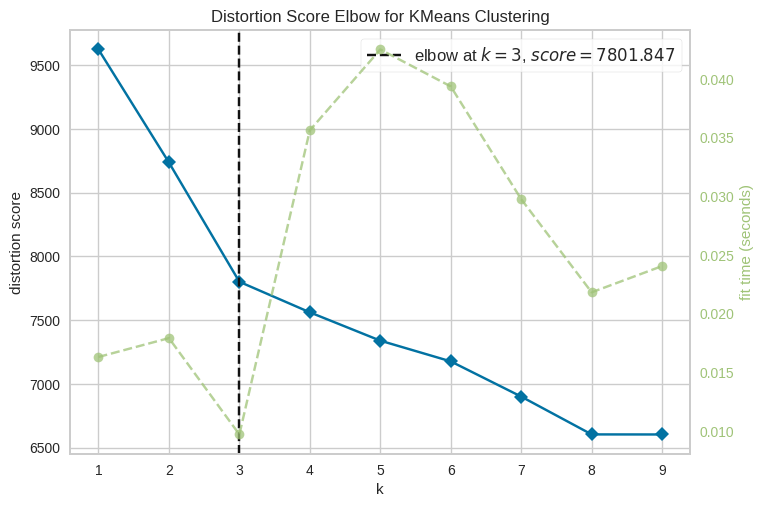

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_encode)
visualizer.show()

In [28]:
# cek silhoutte score untuk setiap k=2...10
for k in range(2,11):
  km_iterate = KMeans(n_clusters=k, random_state=0)
  cluster_labels = km_iterate.fit_predict(df_encode)
  kmeans.fit(df_encode)

  score = silhouette_score(df_encode, cluster_labels)
  print(f"Silhouette Score untuk {k} cluster: {score:.5f}")

Silhouette Score untuk 2 cluster: 0.09529
Silhouette Score untuk 3 cluster: 0.14220
Silhouette Score untuk 4 cluster: 0.10621
Silhouette Score untuk 5 cluster: 0.09117
Silhouette Score untuk 6 cluster: 0.08241
Silhouette Score untuk 7 cluster: 0.09973
Silhouette Score untuk 8 cluster: 0.12240
Silhouette Score untuk 9 cluster: 0.10816
Silhouette Score untuk 10 cluster: 0.12402


In [29]:
km = KMeans(n_clusters=5, random_state=0)
cluster_labels = km.fit_predict(df_encode)

kmeans.fit(df_encode)


KMeans(n_clusters=9, random_state=0)

In [30]:
df_encode['Cluster'] = cluster_labels
df_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic,Cluster
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# membuang kolom yang variansinya mendekati 0
drop_column = ['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score']
df_selection = df_encode.drop(drop_column, axis=1)


In [32]:
df_selection

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic,Cluster
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3


In [33]:
print(f'Shape sebelum PCA: {df_selection.shape}')

Shape sebelum PCA: (2736, 24)


In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_selection)
print(f"Jumlah fitur setelah PCA: {X_pca.shape[1]}")
print(f'Shape setelah PCA: {X_pca.shape}')


Jumlah fitur setelah PCA: 2
Shape setelah PCA: (2736, 2)


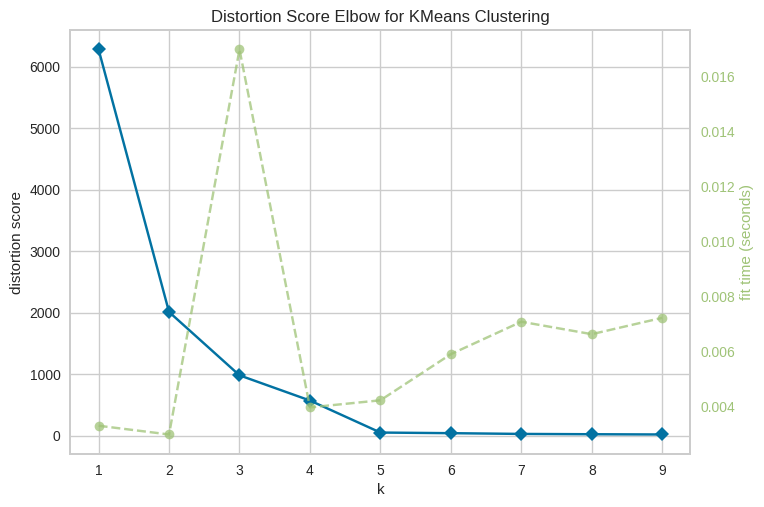

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1, 10), locate_elbow=False)
visualizer.fit(X_pca)
visualizer.show()

In [36]:
# cek silhoutte score untuk setiap k=2...10
for k in range(2,11):
  km_iterate = KMeans(n_clusters=k, random_state=0)
  cluster_labels = km_iterate.fit_predict(X_pca)
  kmeans.fit(X_pca)

  score = silhouette_score(X_pca, cluster_labels)
  print(f"Silhouette Score untuk {k} cluster: {score:.5f}")

Silhouette Score untuk 2 cluster: 0.61712
Silhouette Score untuk 3 cluster: 0.68995
Silhouette Score untuk 4 cluster: 0.71469
Silhouette Score untuk 5 cluster: 0.88849
Silhouette Score untuk 6 cluster: 0.82292
Silhouette Score untuk 7 cluster: 0.71395
Silhouette Score untuk 8 cluster: 0.62921
Silhouette Score untuk 9 cluster: 0.63555
Silhouette Score untuk 10 cluster: 0.58227


Dengan KElbow memberikan k=3, dengan Silhoutte memberikan k=5 sebagai banyak kluster yang optimal. Akan ditentukan mana pilihan yang baik pada tahap visualisasi.

In [37]:
kmeans_df_selection_pca = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans_df_selection_pca.fit_predict(X_pca)
kmeans_df_selection_pca.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [38]:
kmeans_df_selection_pca_alternate = KMeans(n_clusters=3, random_state=42)
cluster_labels_alternate = kmeans_df_selection_pca_alternate.fit_predict(X_pca)
kmeans_df_selection_pca_alternate.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

Performa yang diperoleh setelah dilakukan feature selection memberikan perbedaan signifikan, dari 0.14 menjadi 0.88.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

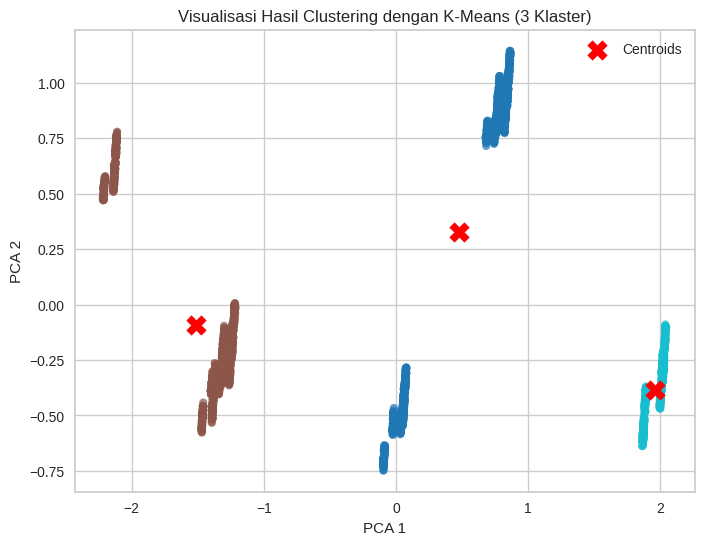

In [67]:
# 2D PCA Projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_alternate, cmap='tab10', s=30, alpha=0.7)
plt.scatter(kmeans_df_selection_pca_alternate.cluster_centers_[:, 0],
            kmeans_df_selection_pca_alternate.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')  # Menampilkan centroid
plt.title('Visualisasi Hasil Clustering dengan K-Means (3 Klaster)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

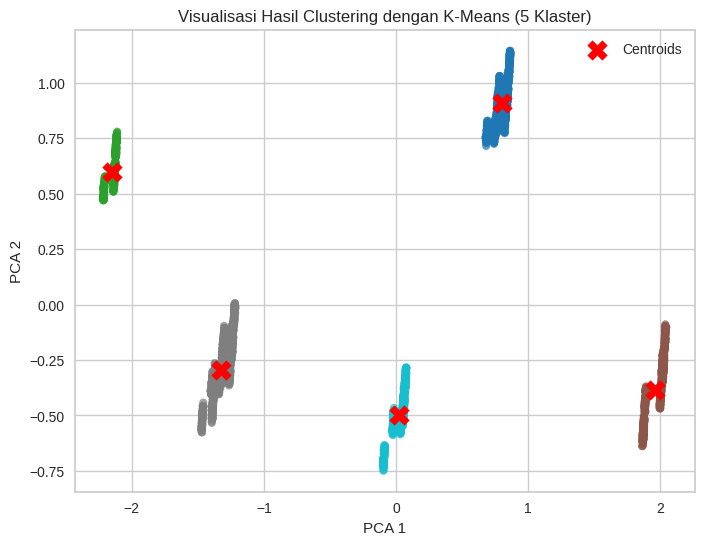

In [40]:
# 2D PCA Projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=30, alpha=0.7)
plt.scatter(kmeans_df_selection_pca.cluster_centers_[:, 0],
            kmeans_df_selection_pca.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')  # Menampilkan centroid
plt.title('Visualisasi Hasil Clustering dengan K-Means (5 Klaster)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

Dari sini diperoleh bahwa k=5 merupakan pemilihan cluster yang paling sesuai.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [41]:
df_selection

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic,Cluster
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3


In [42]:
df

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,Calm,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,Calm,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [43]:
drop_column = ['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score']
df_cluster = df.drop(drop_column, axis=1)
df_cluster['Cluster'] = kmeans_df_selection_pca.labels_

In [44]:
df_cluster.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,1
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,3
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,4
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,3
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,2


In [45]:
df_cluster0 = df_cluster[df_cluster['Cluster'] == 0]
df_cluster1 = df_cluster[df_cluster['Cluster'] == 1]
df_cluster2 = df_cluster[df_cluster['Cluster'] == 2]
df_cluster3 = df_cluster[df_cluster['Cluster'] == 3]
df_cluster4 = df_cluster[df_cluster['Cluster'] == 4]

In [46]:
numeric_features = df_cluster.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop('Cluster')
numeric_features

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Weekly_Voyage_Count', 'Average_Load_Percentage'],
      dtype='object')

In [47]:
categorical_features = df_cluster.select_dtypes(include=['object']).columns
categorical_features

Index(['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Weather_Condition'],
      dtype='object')

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster 0.

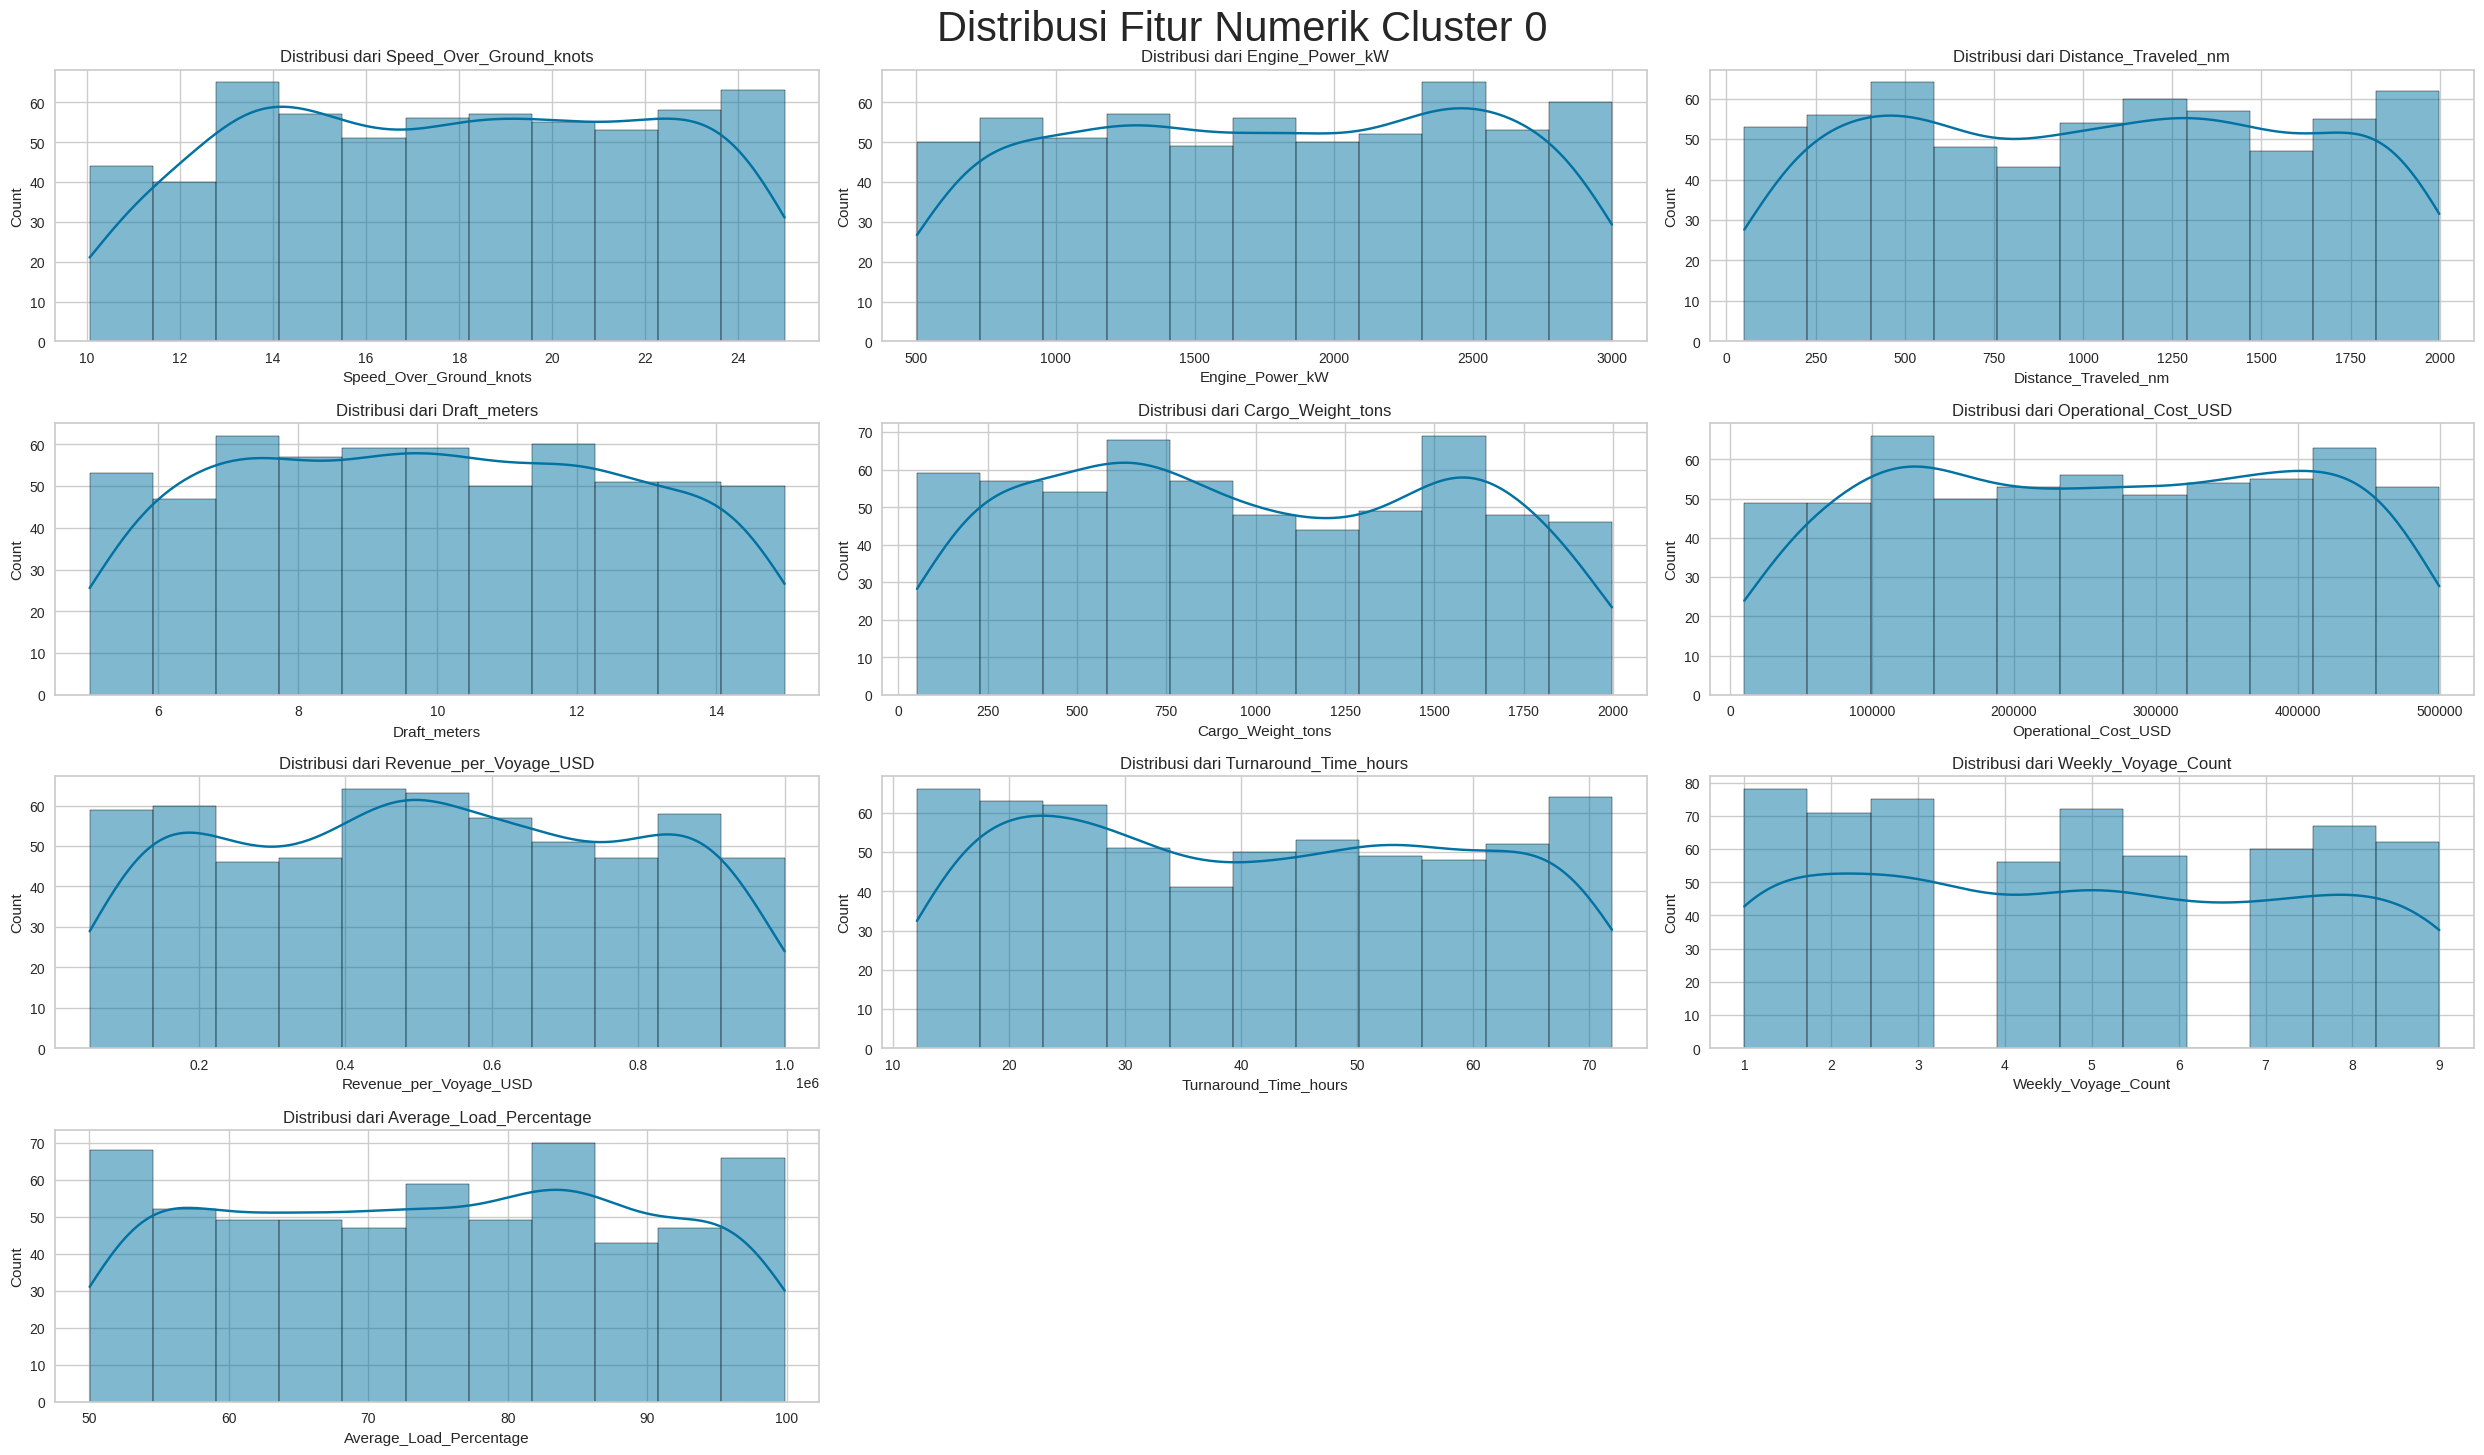

In [48]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df_cluster0[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.suptitle('Distribusi Fitur Numerik Cluster 0', fontsize=30)
plt.tight_layout()
plt.show()

In [49]:
df_cluster0_mean = df_cluster0[numeric_features].mean()
df_cluster0_std = df_cluster0[numeric_features].std()

stats0 = pd.DataFrame({
    'mean0': df_cluster0_mean,
    'std0': df_cluster0_std
})
stats0

,mean0,std0
Speed_Over_Ground_knots,17.842726,4.252714
Engine_Power_kW,1776.917212,728.434476
Distance_Traveled_nm,1033.795570,575.017286
Draft_meters,9.964202,2.832861
Cargo_Weight_tons,994.998248,560.210859
Operational_Cost_USD,258920.767625,140667.043248
Revenue_per_Voyage_USD,517536.811634,270710.465247
Turnaround_Time_hours,41.274072,18.057390
Weekly_Voyage_Count,4.826377,2.624156
Average_Load_Percentage,74.897294,14.722615


<ipython-input-50-e8557d03b7be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster0, palette='tab10')
<ipython-input-50-e8557d03b7be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster0, palette='tab10')
<ipython-input-50-e8557d03b7be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster0, palette='tab10')
<ipython-input-50-e8557d03b7be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

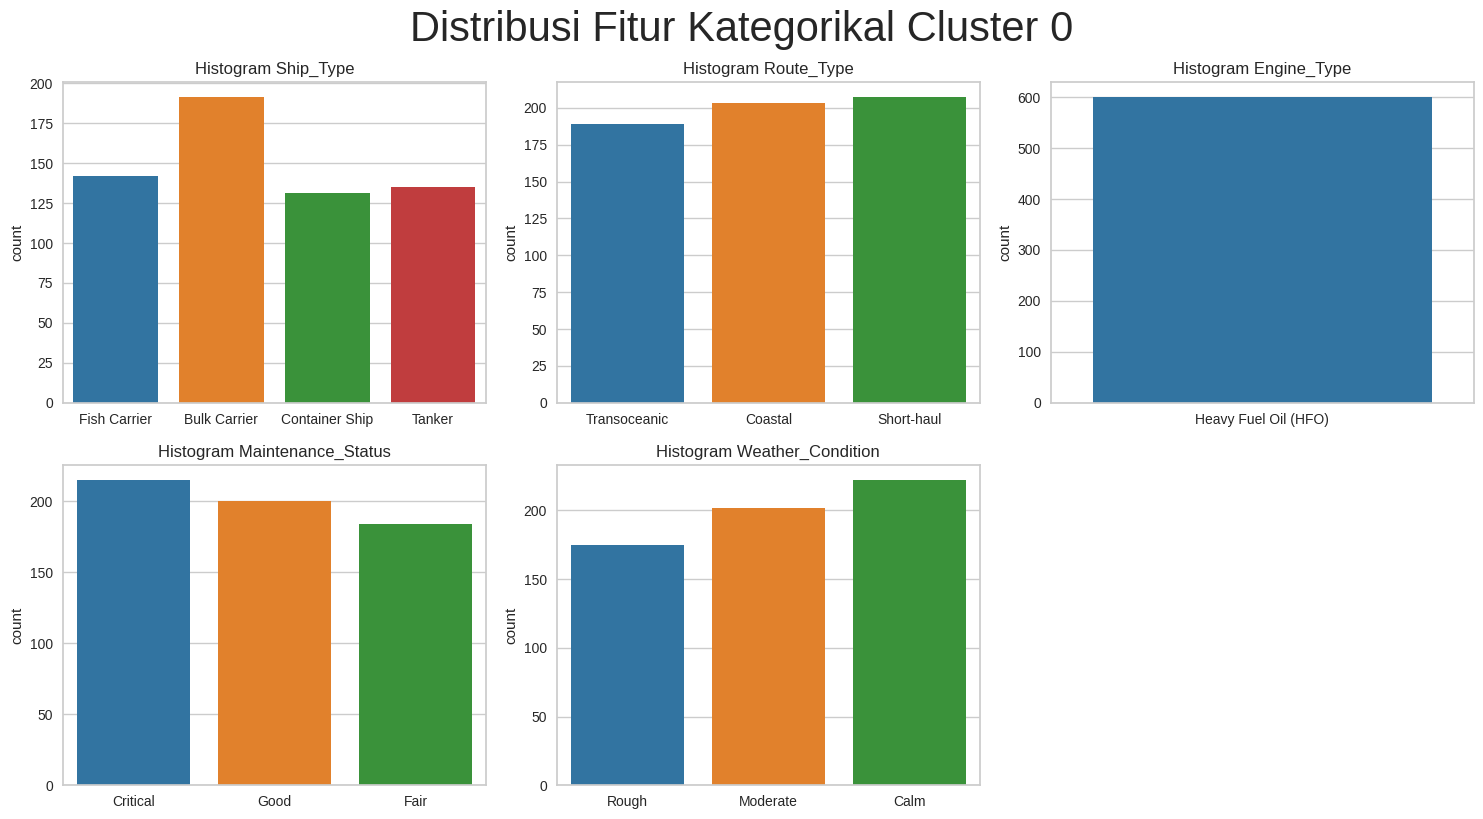

In [50]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df_cluster0, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')
plt.suptitle('Distribusi Fitur Kategorikal Cluster 0', fontsize=30)
plt.tight_layout()
plt.show()

Cluster 1.

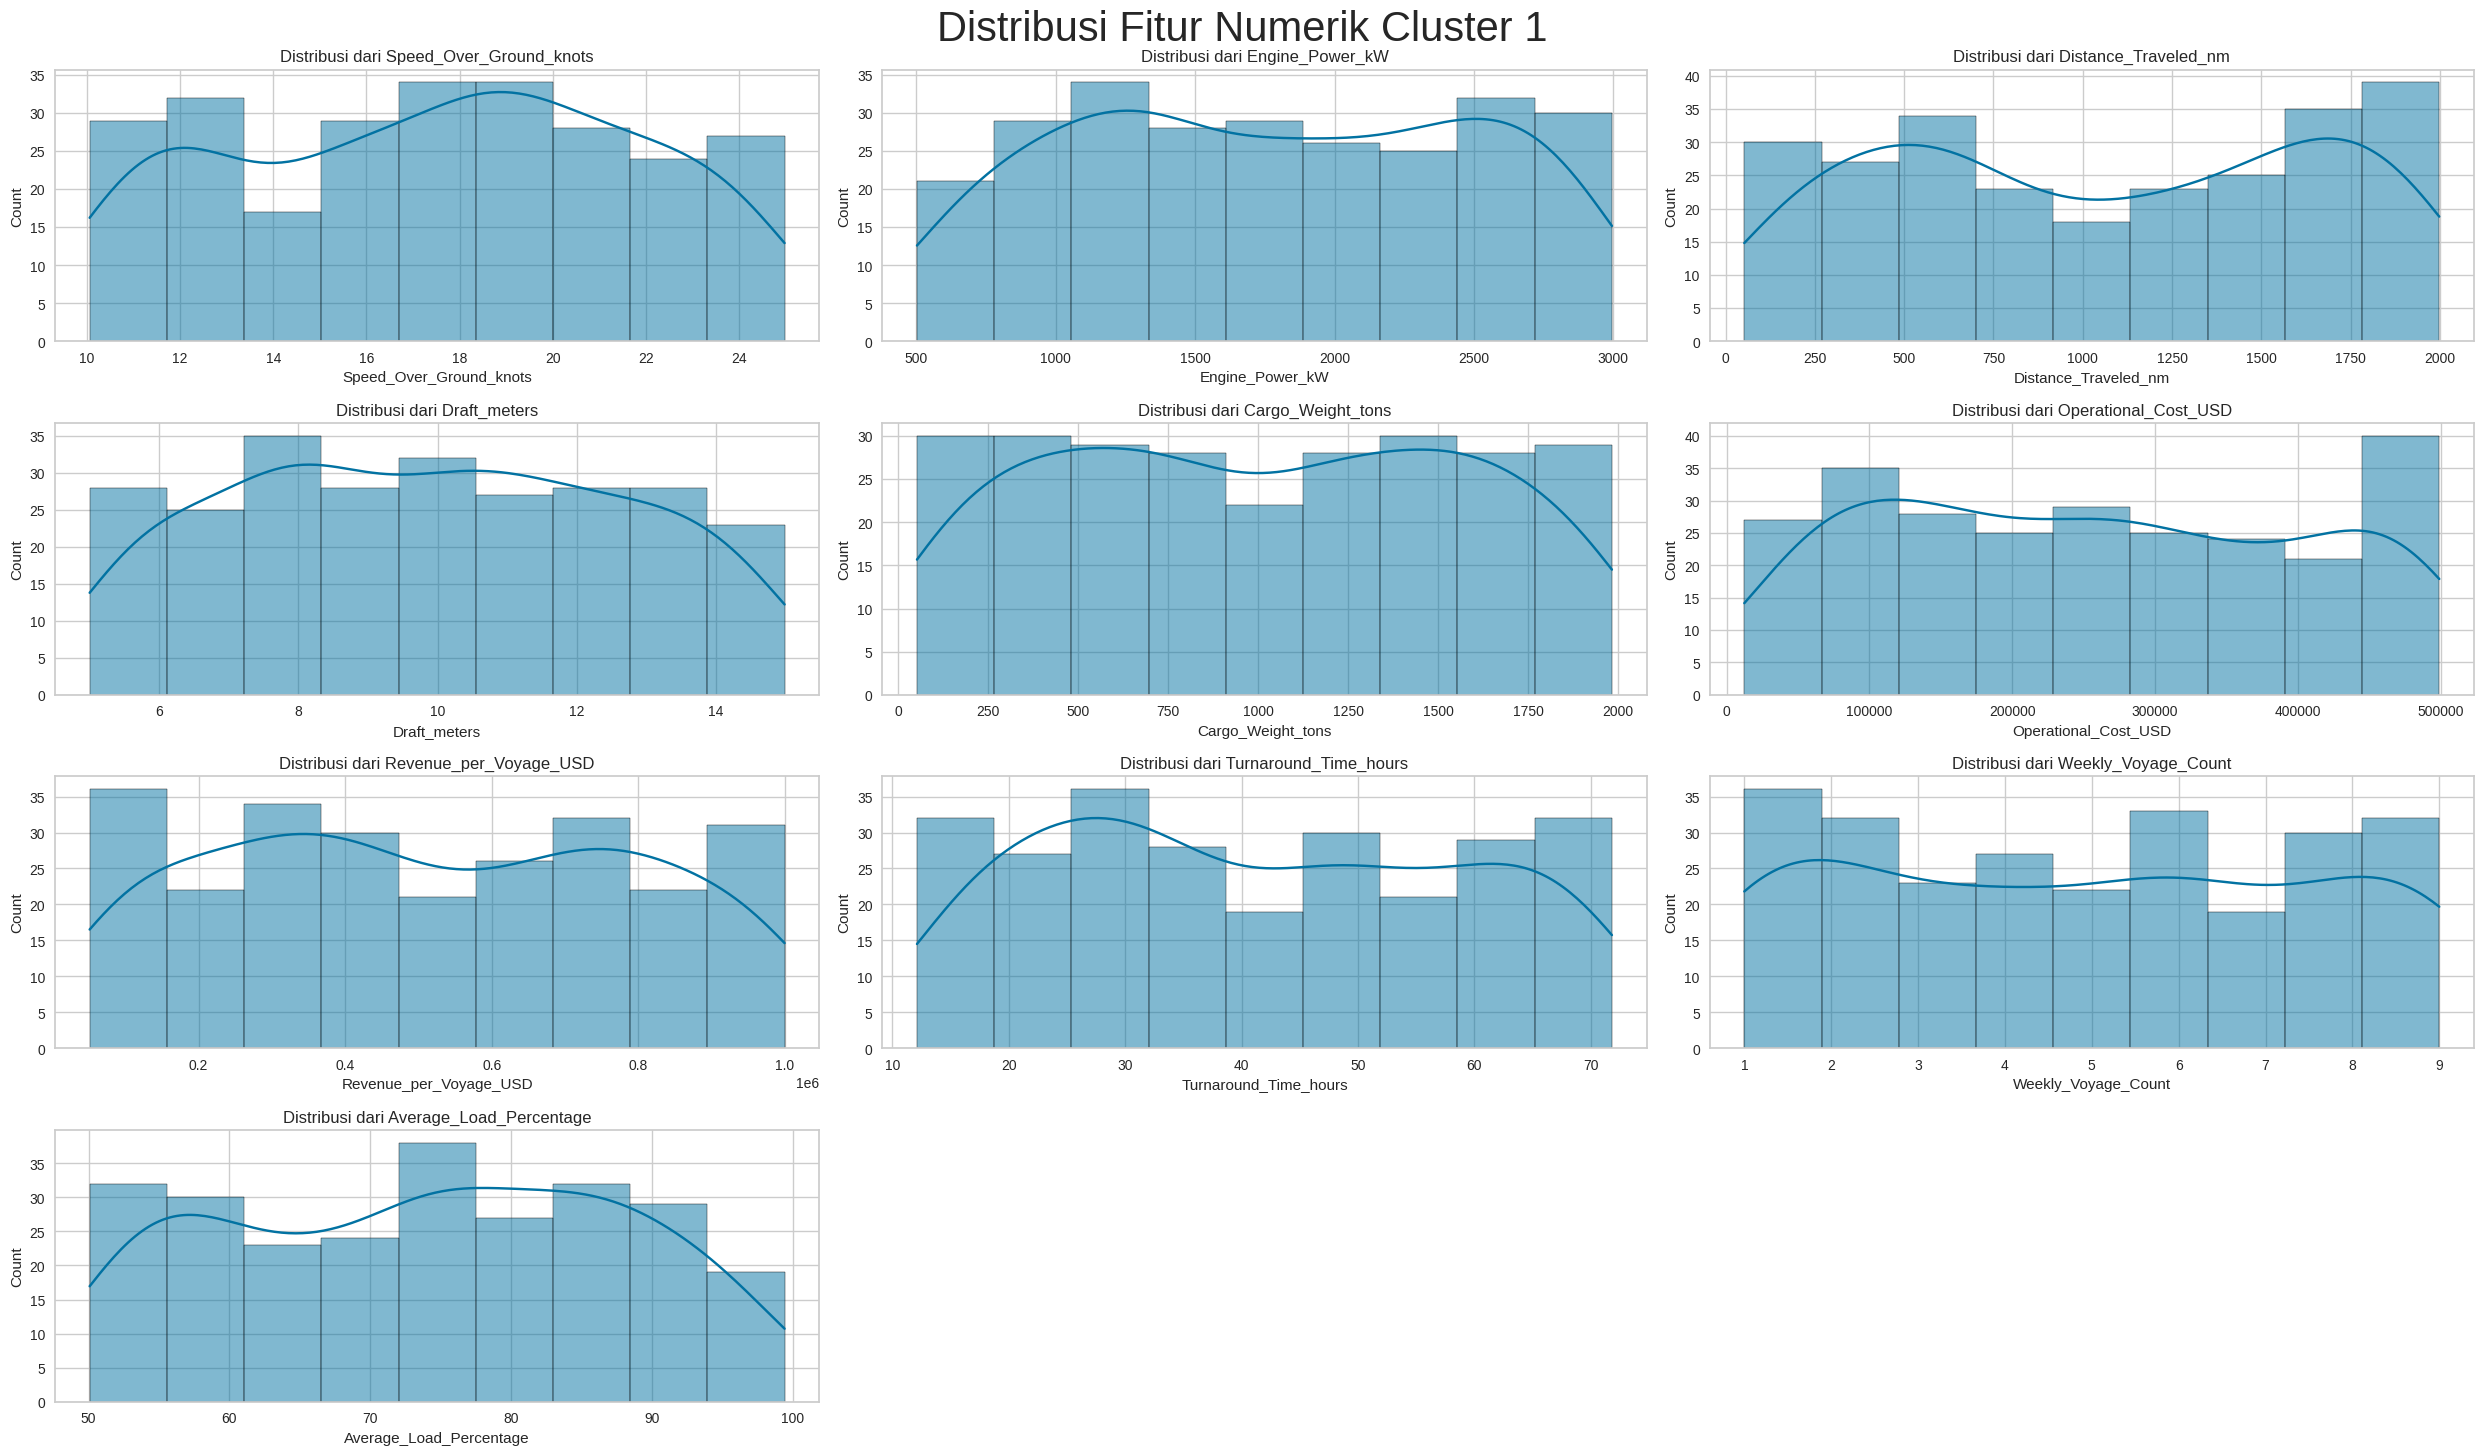

In [51]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df_cluster1[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.suptitle('Distribusi Fitur Numerik Cluster 1', fontsize=30)
plt.tight_layout()
plt.show()

In [52]:
df_cluster1_mean = df_cluster1[numeric_features].mean()
df_cluster1_std = df_cluster1[numeric_features].std()

stats1 = pd.DataFrame({
    'mean1': df_cluster1_mean,
    'std1': df_cluster1_std
})
stats1

,mean1,std1
Speed_Over_Ground_knots,17.457692,4.312084
Engine_Power_kW,1775.673668,721.854110
Distance_Traveled_nm,1056.760865,604.596543
Draft_meters,9.890869,2.799678
Cargo_Weight_tons,1006.844641,574.256805
Operational_Cost_USD,256280.286304,146394.005844
Revenue_per_Voyage_USD,514488.036806,283528.484091
Turnaround_Time_hours,41.487003,17.749581
Weekly_Voyage_Count,4.905512,2.719954
Average_Load_Percentage,73.827059,14.093584


<ipython-input-53-ba96967e1507>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster1, palette='tab10')
<ipython-input-53-ba96967e1507>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster1, palette='tab10')
<ipython-input-53-ba96967e1507>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster1, palette='tab10')
<ipython-input-53-ba96967e1507>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

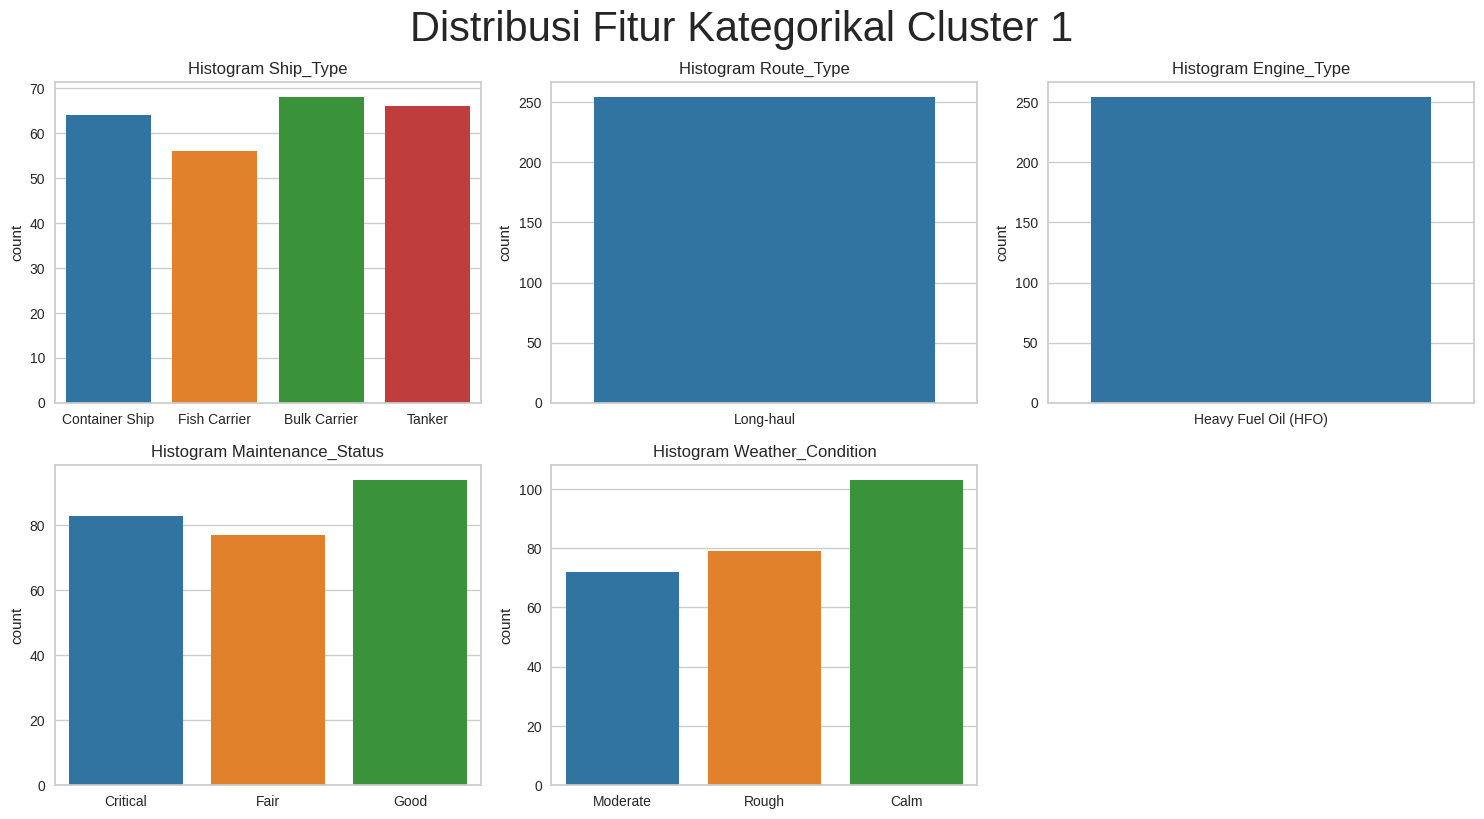

In [53]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df_cluster1, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')
plt.suptitle('Distribusi Fitur Kategorikal Cluster 1', fontsize=30)
plt.tight_layout()
plt.show()

Cluster 2.

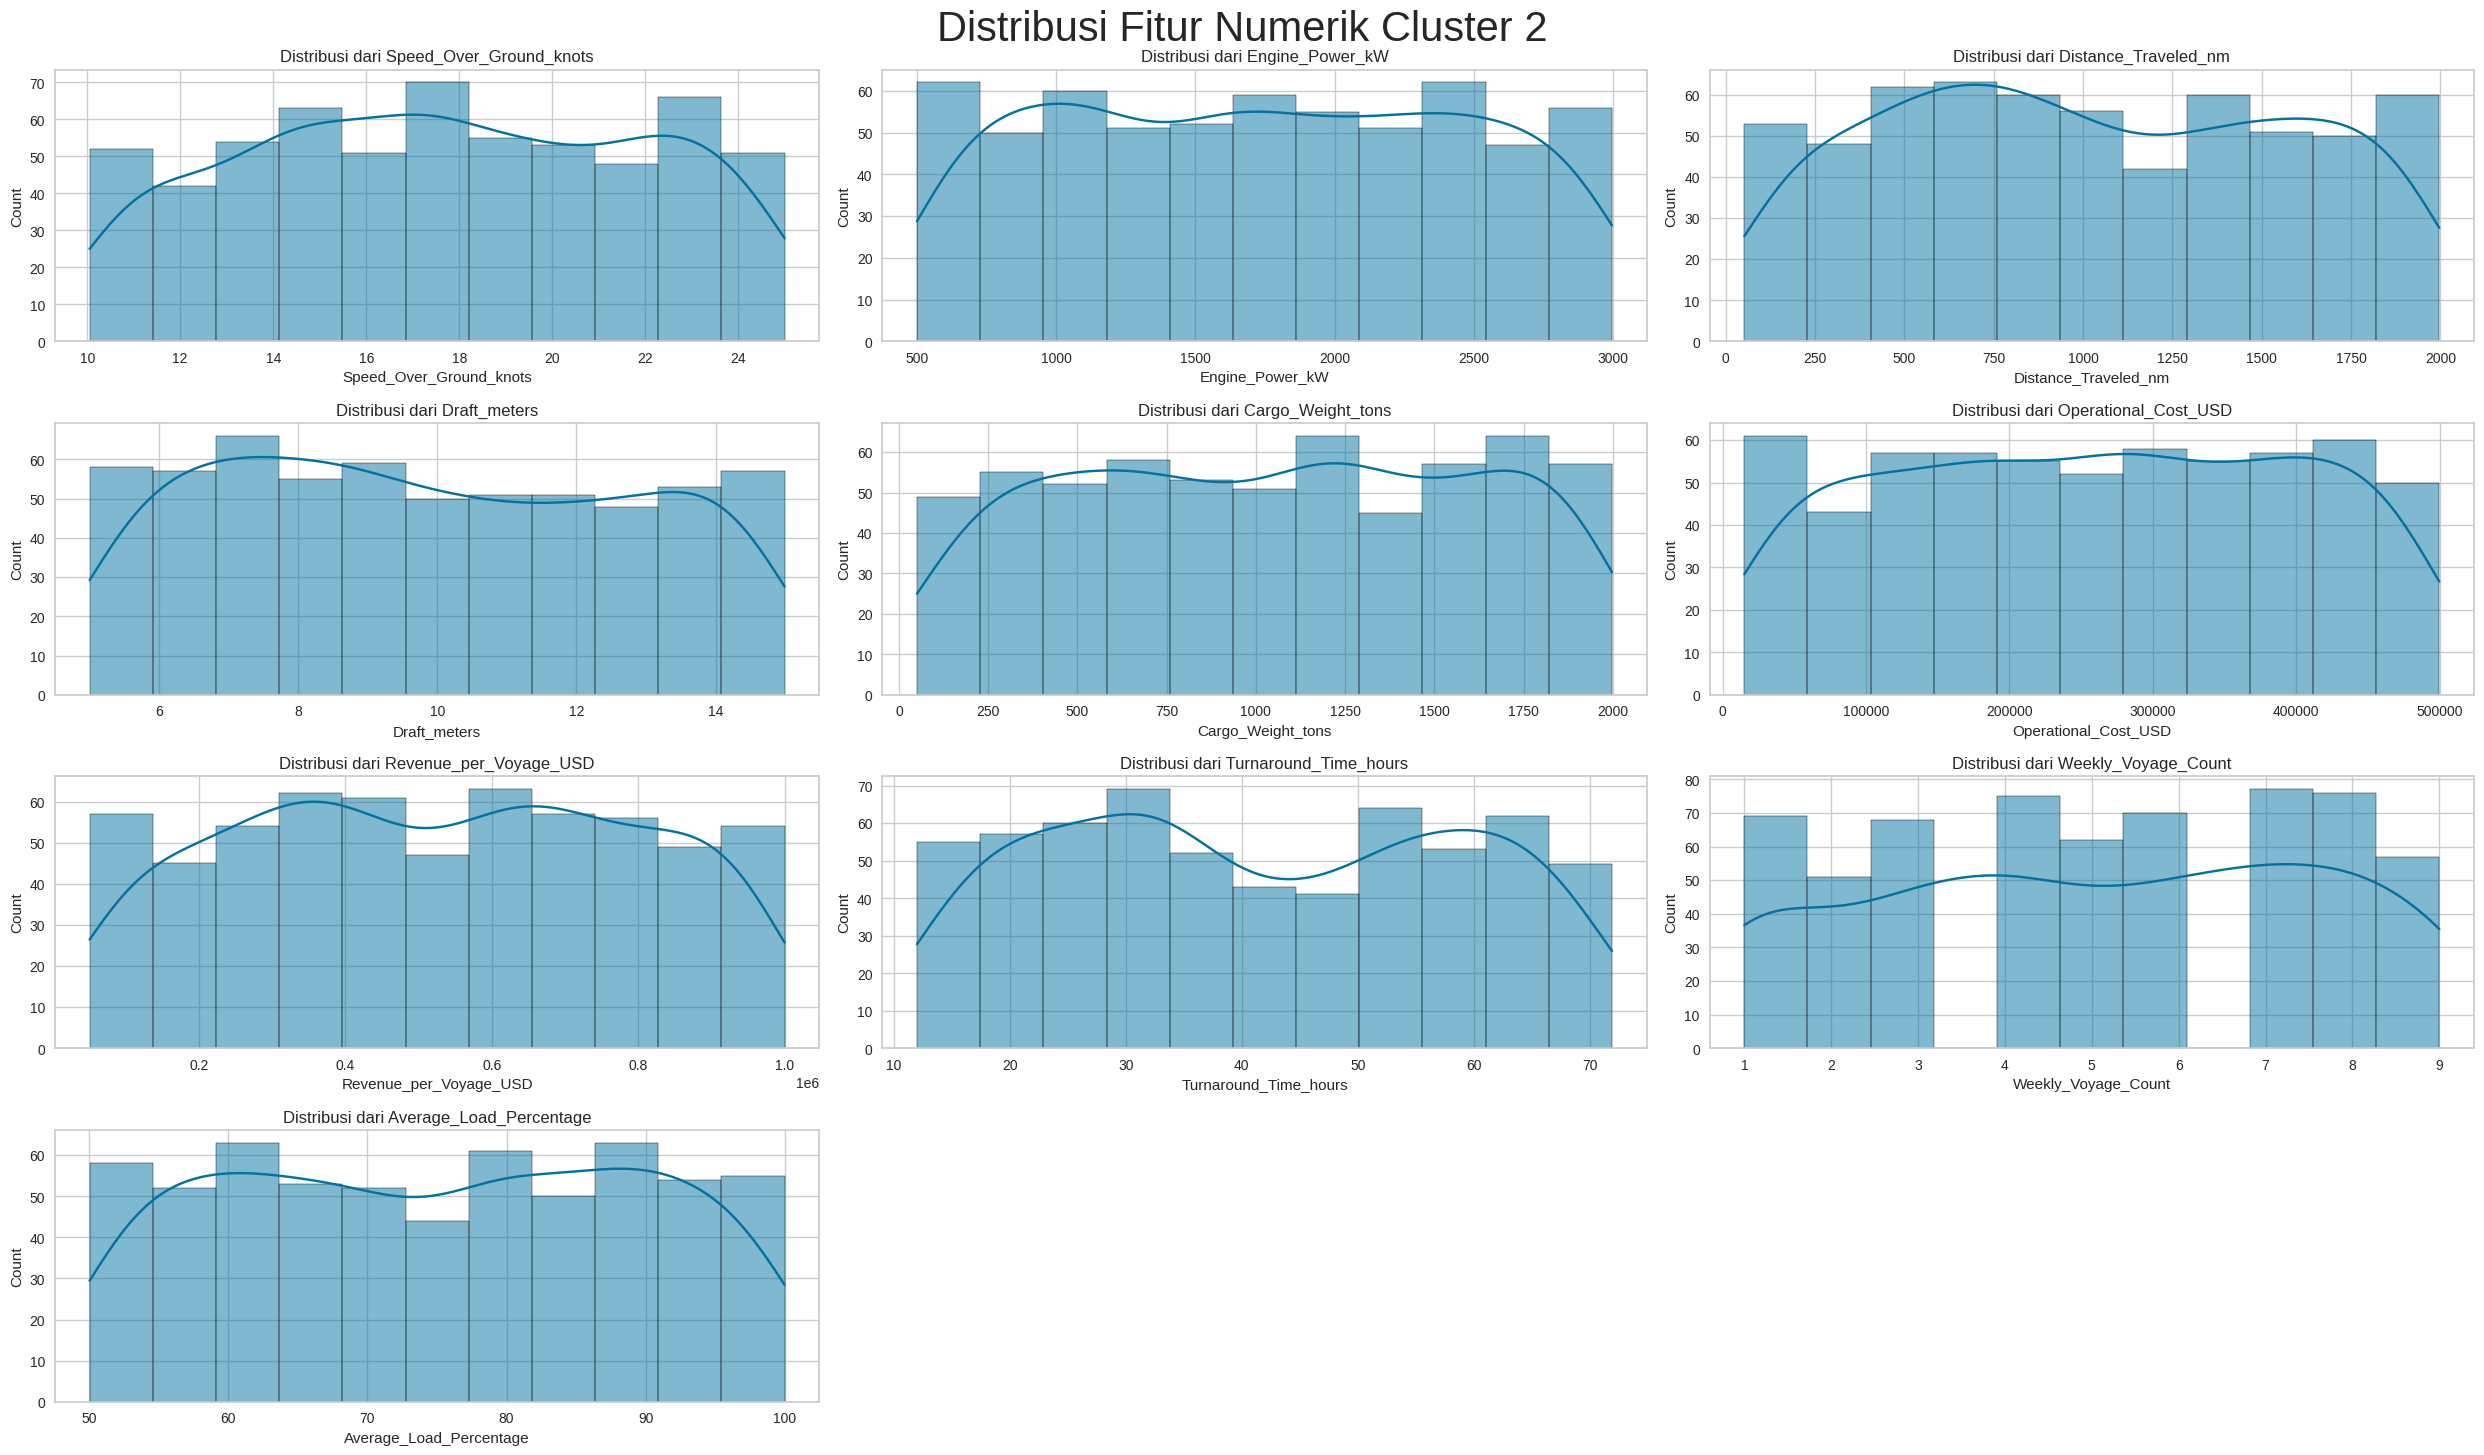

In [54]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df_cluster2[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.suptitle('Distribusi Fitur Numerik Cluster 2', fontsize=30)
plt.tight_layout()
plt.show()

In [55]:
df_cluster2_mean = df_cluster2[numeric_features].mean()
df_cluster2_std = df_cluster2[numeric_features].std()

stats2 = pd.DataFrame({
    'mean2': df_cluster2_mean,
    'std2': df_cluster2_std
})
stats2

,mean2,std2
Speed_Over_Ground_knots,17.679243,4.227138
Engine_Power_kW,1737.954373,727.002754
Distance_Traveled_nm,1021.053521,556.664173
Draft_meters,9.851602,2.919762
Cargo_Weight_tons,1046.455003,564.079474
Operational_Cost_USD,258035.274695,139708.539402
Revenue_per_Voyage_USD,525379.045754,269181.881786
Turnaround_Time_hours,41.496608,17.460674
Weekly_Voyage_Count,5.066116,2.534972
Average_Load_Percentage,74.991265,14.716020


<ipython-input-56-8053bbad0b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster2, palette='tab10')
<ipython-input-56-8053bbad0b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster2, palette='tab10')
<ipython-input-56-8053bbad0b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster2, palette='tab10')
<ipython-input-56-8053bbad0b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

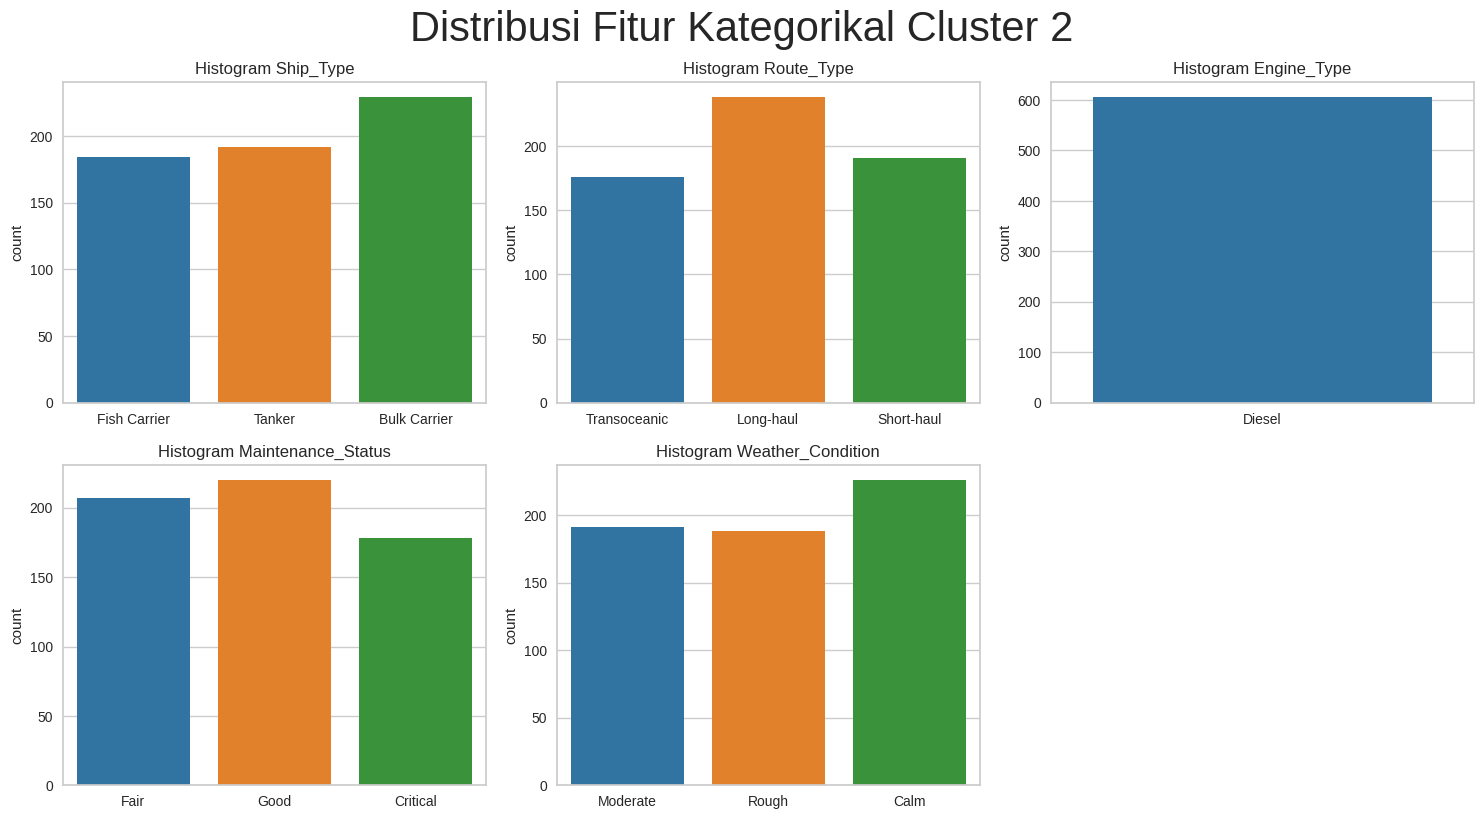

In [56]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df_cluster2, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')
plt.suptitle('Distribusi Fitur Kategorikal Cluster 2', fontsize=30)
plt.tight_layout()
plt.show()

Cluster 3.

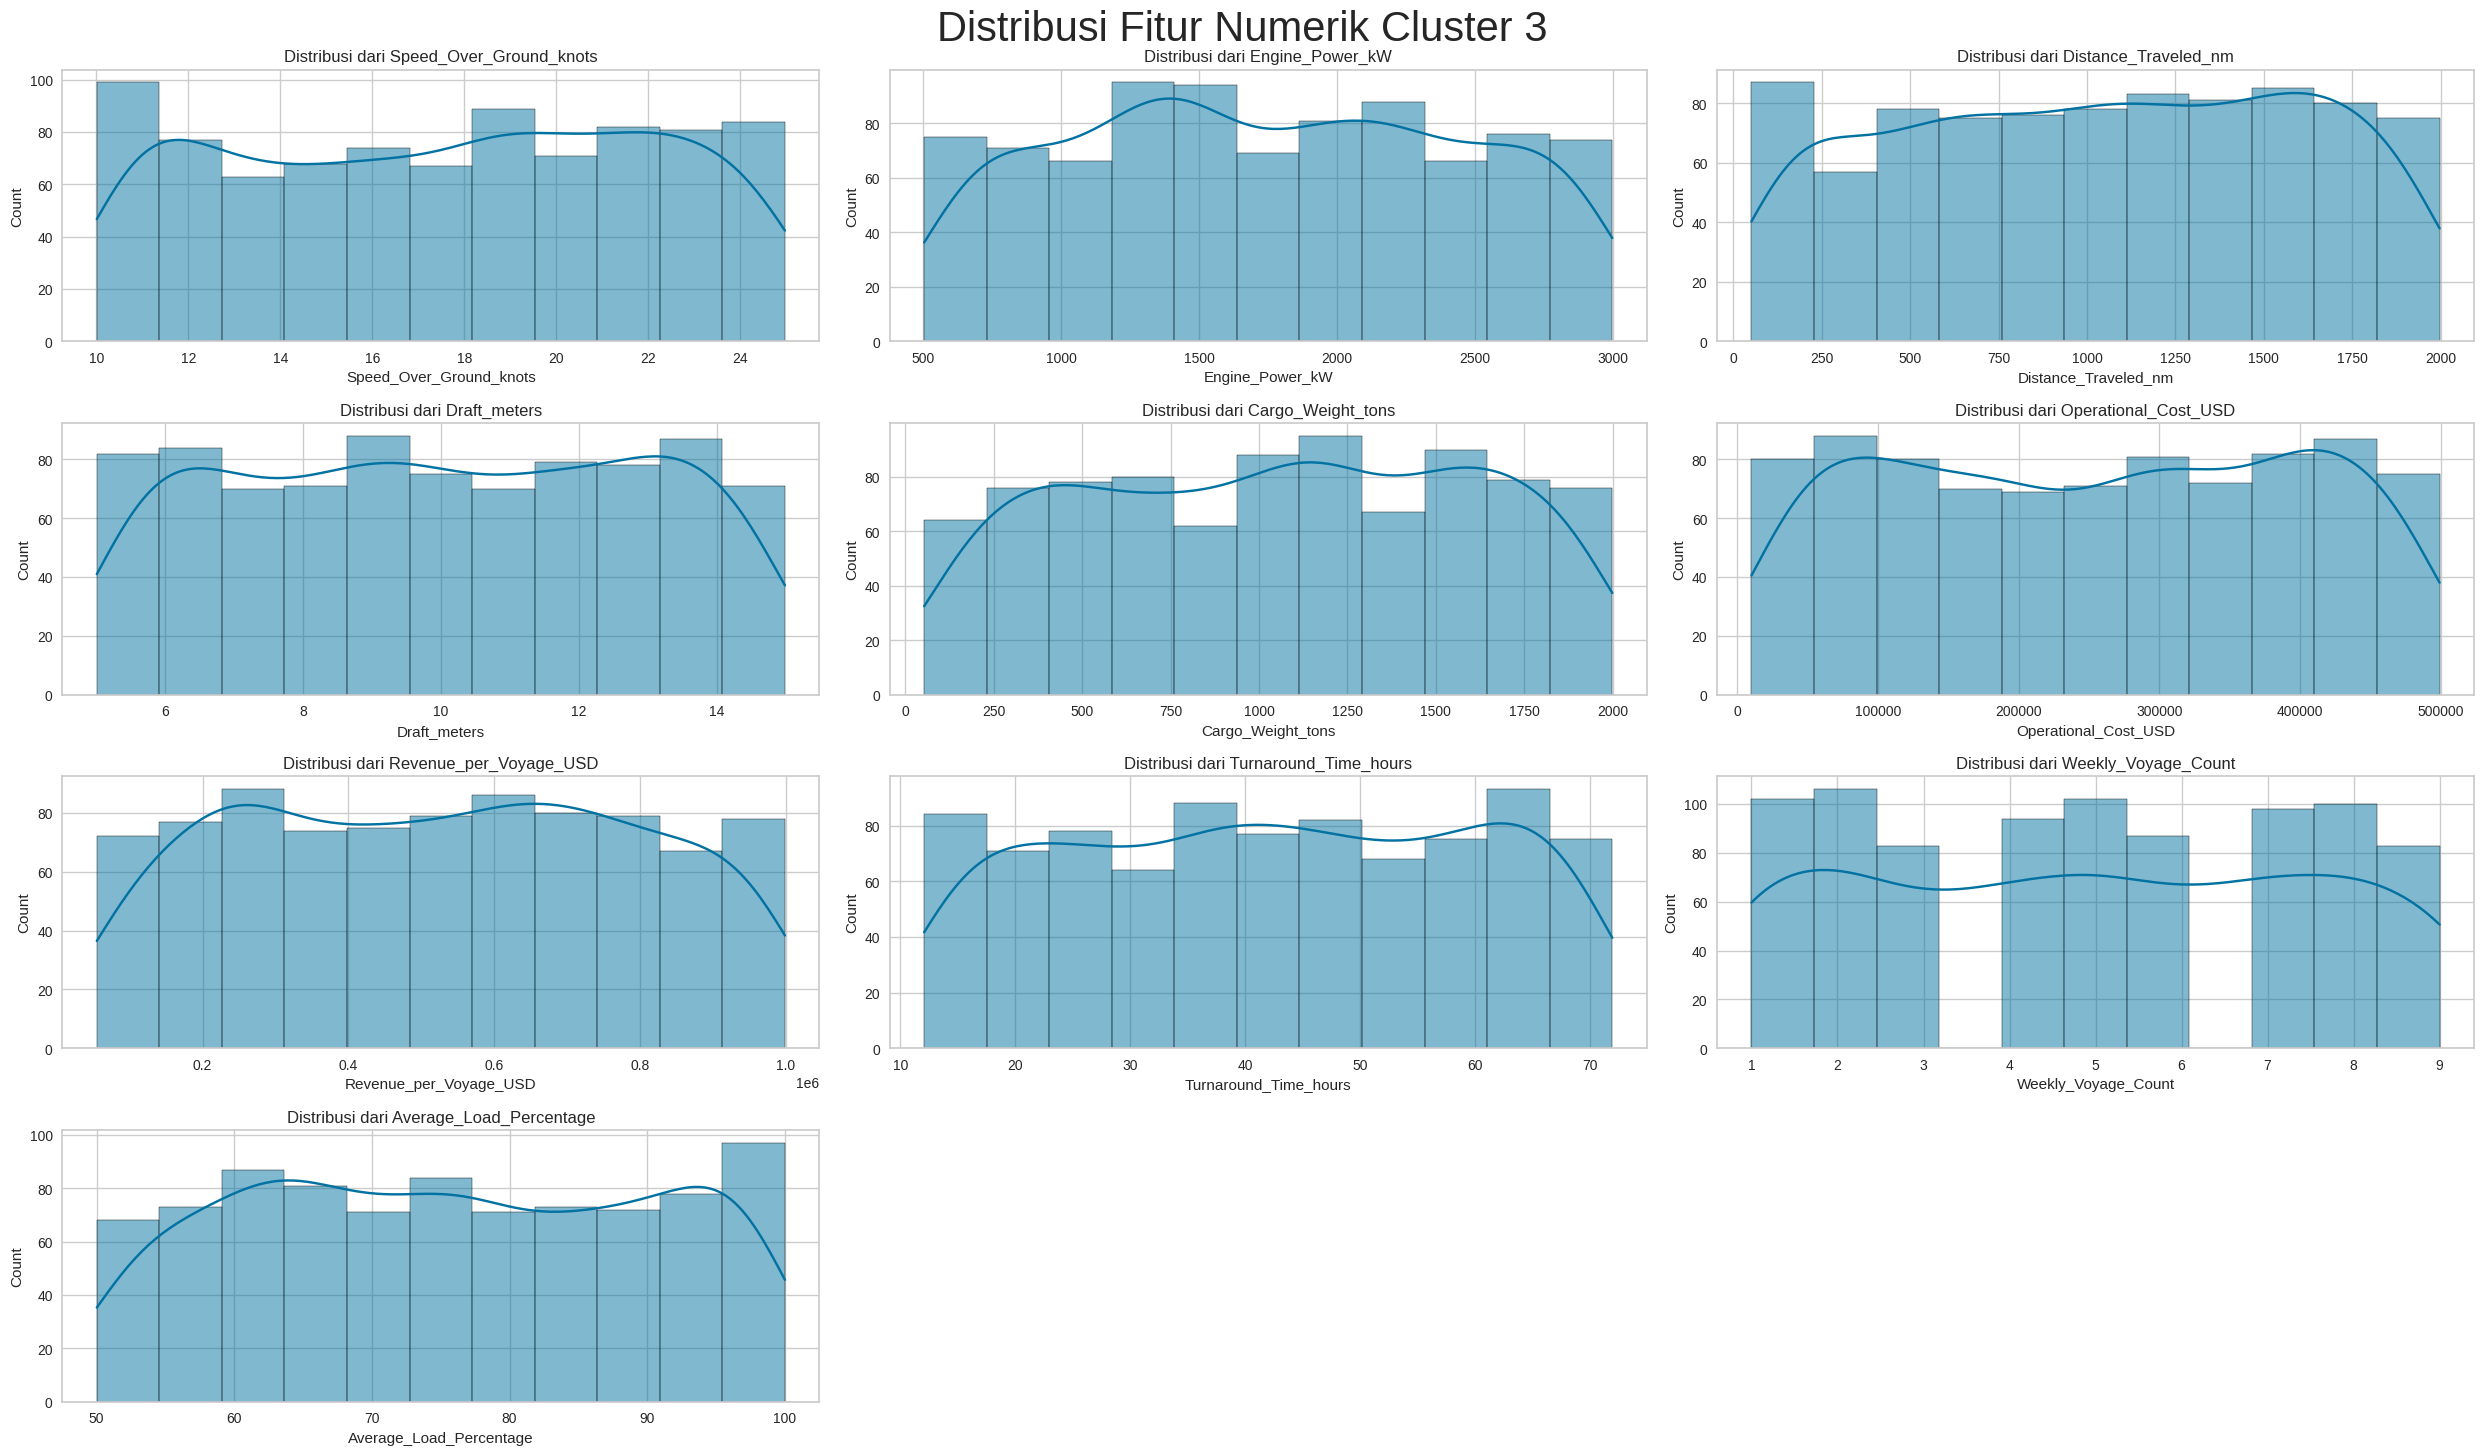

In [57]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df_cluster3[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.suptitle('Distribusi Fitur Numerik Cluster 3', fontsize=30)
plt.tight_layout()
plt.show()

In [58]:
df_cluster3_mean = df_cluster3[numeric_features].mean()
df_cluster3_std = df_cluster3[numeric_features].std()

stats3 = pd.DataFrame({
    'mean3': df_cluster3_mean,
    'std3': df_cluster3_std
})
stats3

,mean3,std3
Speed_Over_Ground_knots,17.525405,4.475458
Engine_Power_kW,1749.199047,706.511056
Distance_Traveled_nm,1038.834980,560.481564
Draft_meters,9.985200,2.899407
Cargo_Weight_tons,1049.922813,549.378663
Operational_Cost_USD,254429.816350,143436.232365
Revenue_per_Voyage_USD,525933.081904,269708.561291
Turnaround_Time_hours,42.216328,17.501317
Weekly_Voyage_Count,4.916959,2.586468
Average_Load_Percentage,75.578765,14.556189


<ipython-input-59-aca491ace9fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster3, palette='tab10')
<ipython-input-59-aca491ace9fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster3, palette='tab10')
<ipython-input-59-aca491ace9fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster3, palette='tab10')
<ipython-input-59-aca491ace9fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

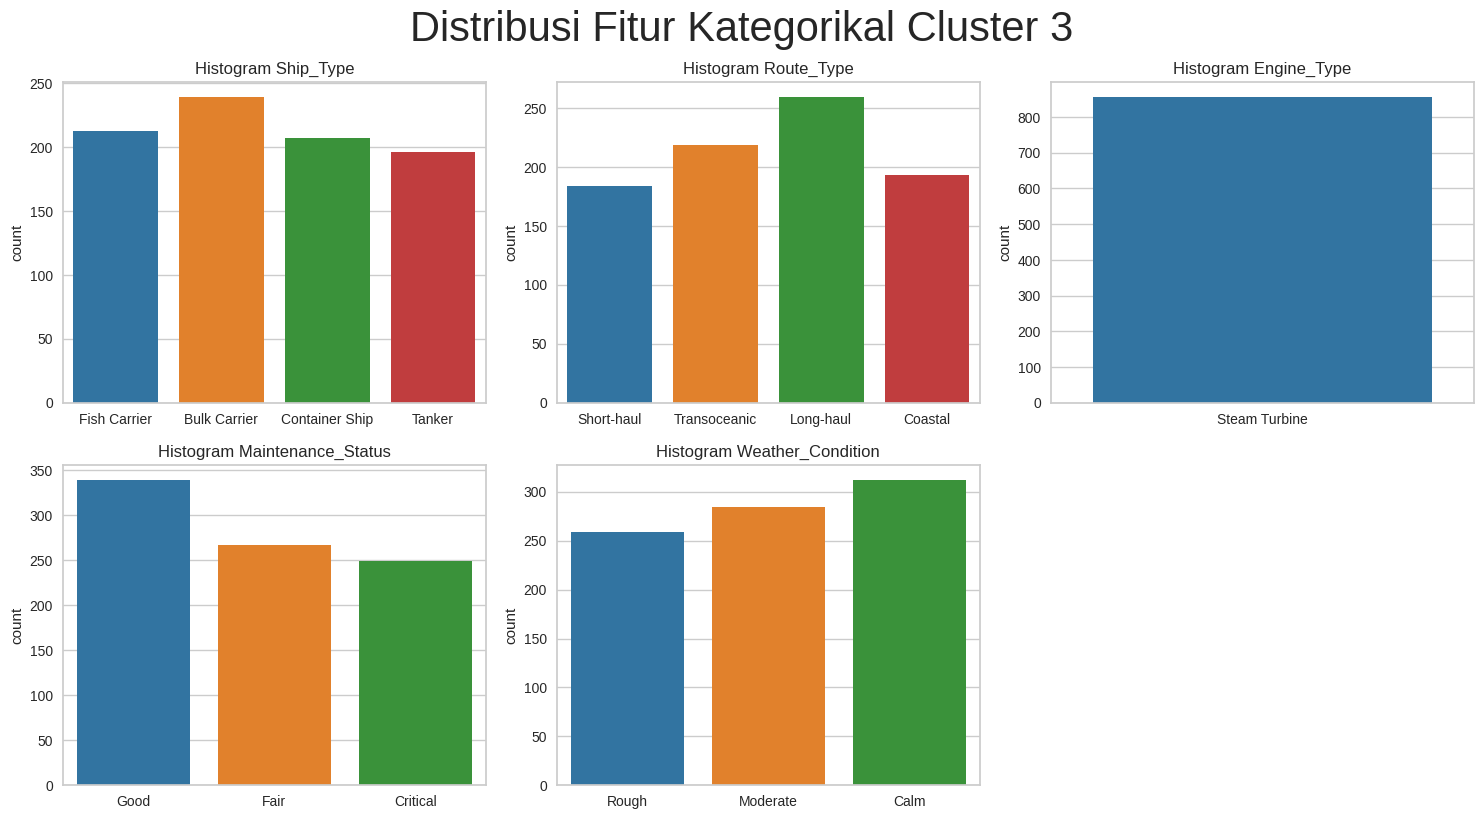

In [59]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df_cluster3, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')
plt.suptitle('Distribusi Fitur Kategorikal Cluster 3', fontsize=30)
plt.tight_layout()
plt.show()

Cluster 4.

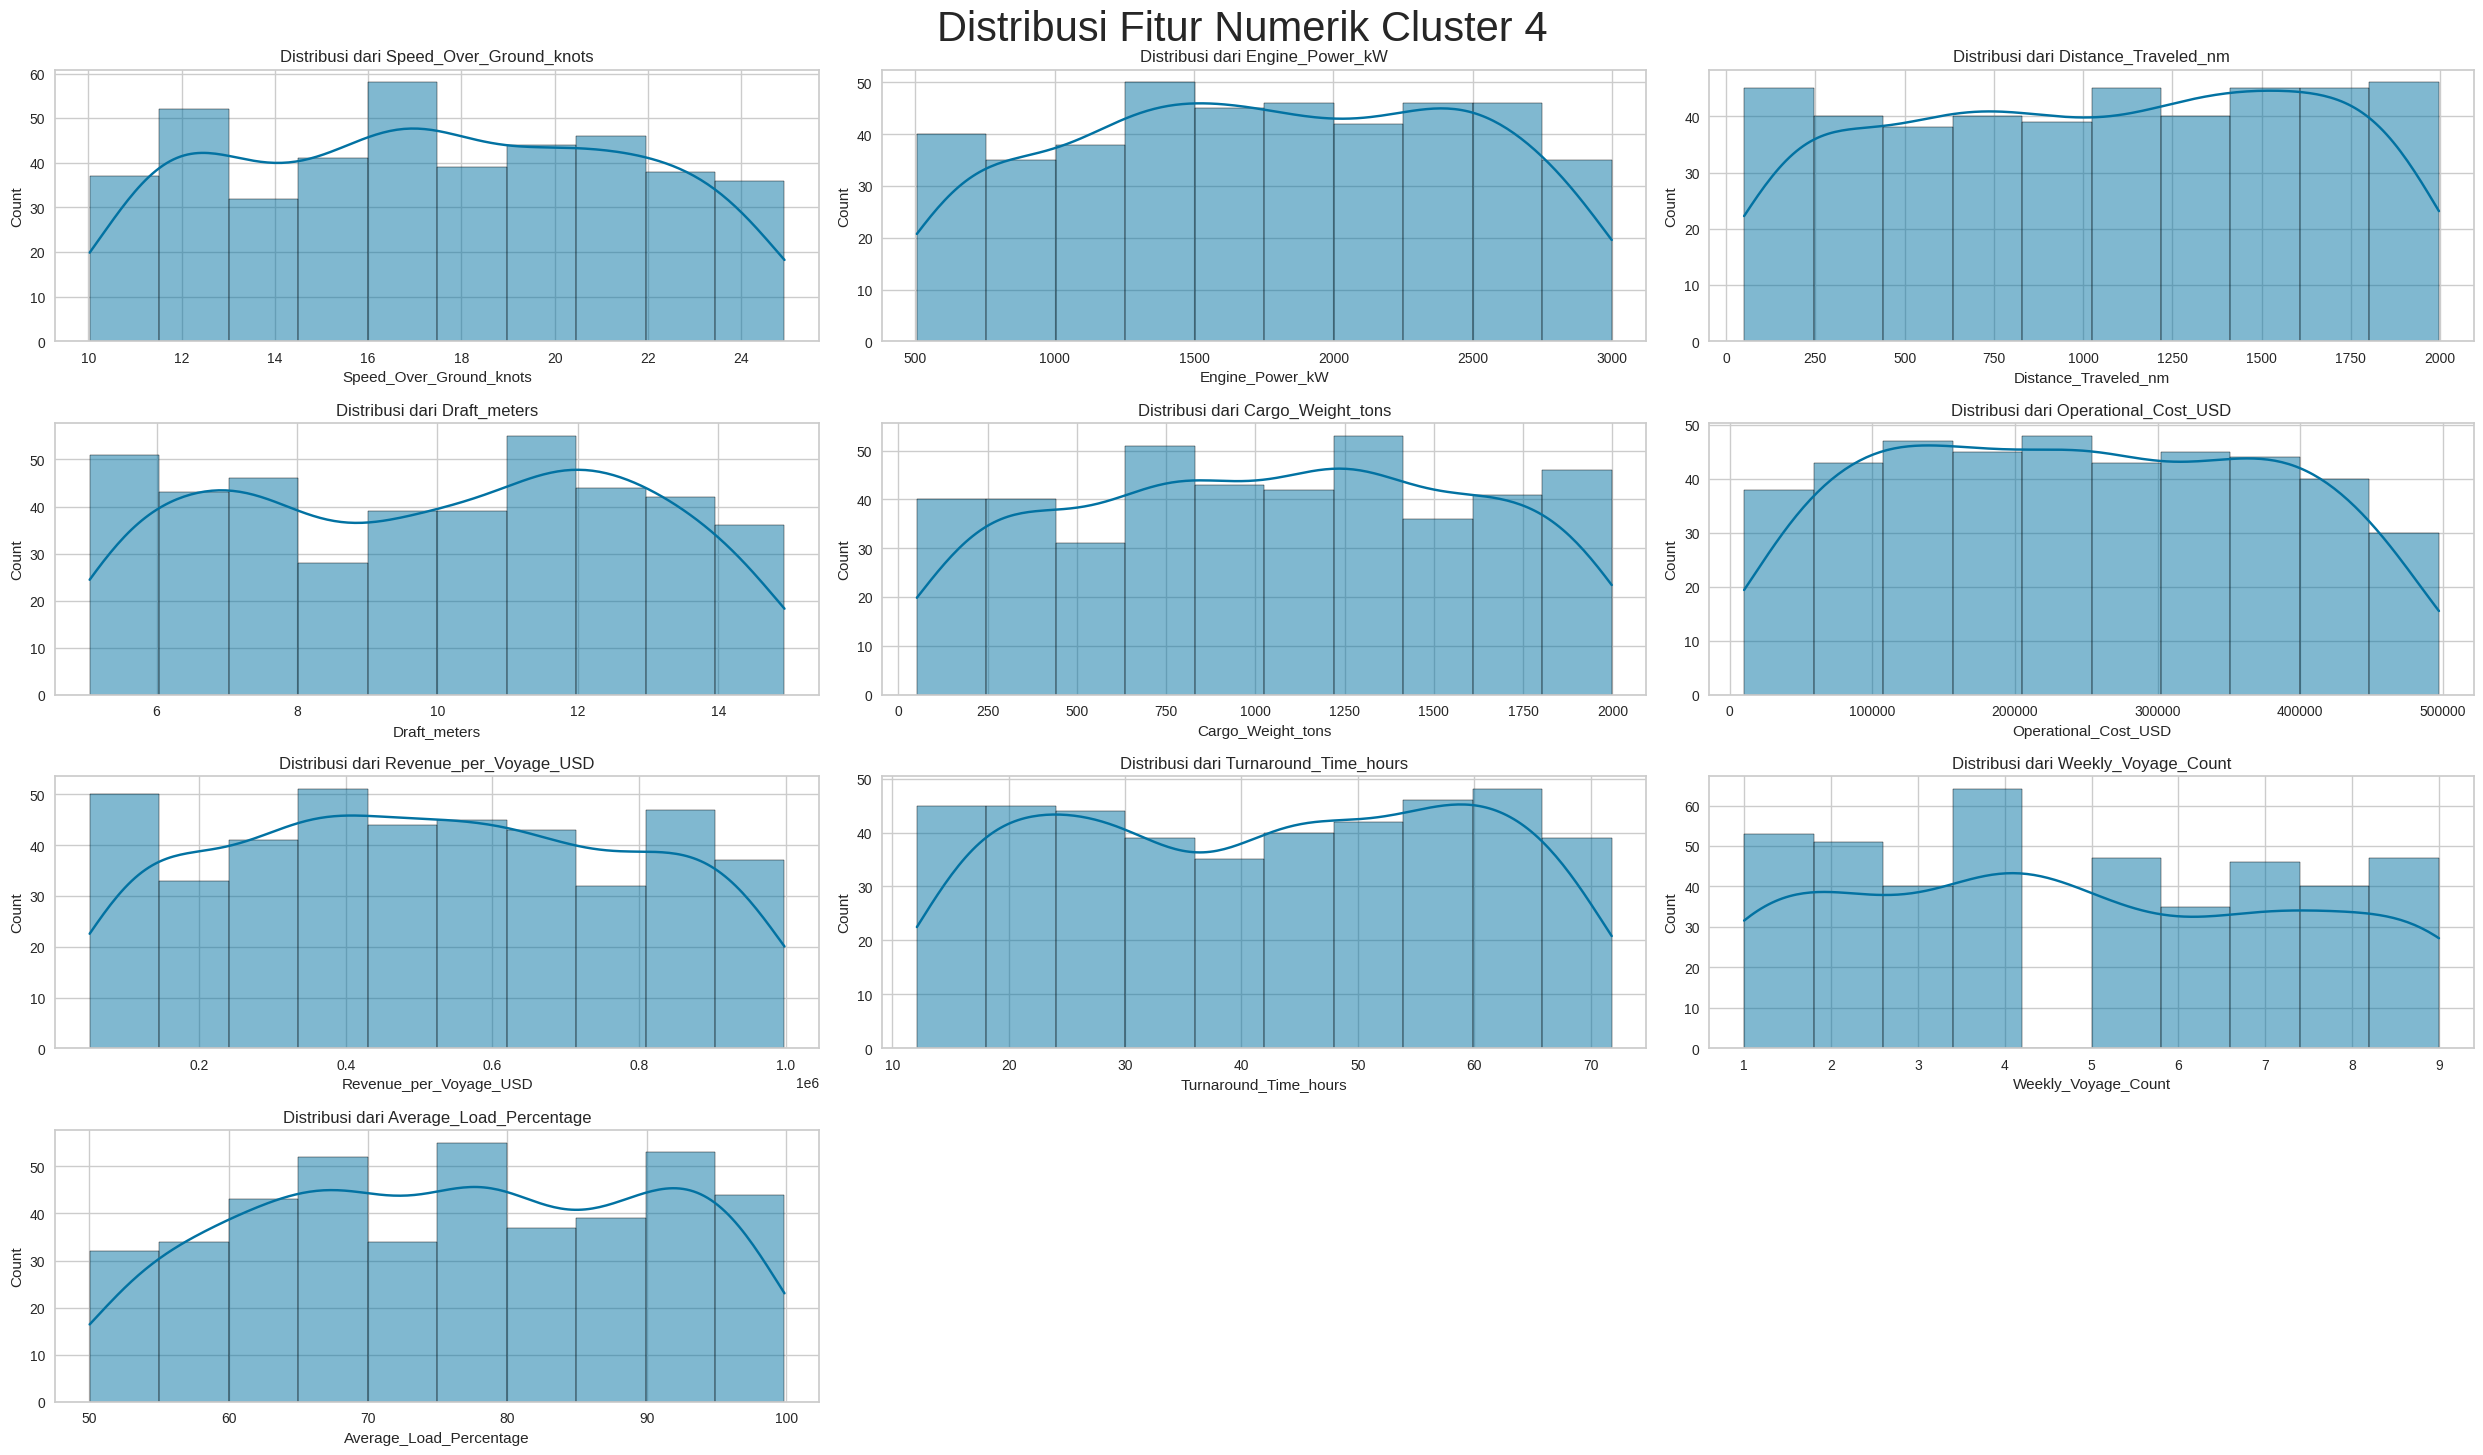

In [60]:
plt.figure(figsize=(25,18))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(5,3,i)
  sns.histplot(df_cluster4[feature], kde=True)
  plt.title(f'Distribusi dari {feature}')
plt.suptitle('Distribusi Fitur Numerik Cluster 4', fontsize=30)
plt.tight_layout()
plt.show()

In [61]:
df_cluster4_mean = df_cluster4[numeric_features].mean()
df_cluster4_std = df_cluster4[numeric_features].std()

stats4 = pd.DataFrame({
    'mean4': df_cluster4_mean,
    'std4': df_cluster4_std
})
stats4

,mean4,std4
Speed_Over_Ground_knots,17.397694,4.178613
Engine_Power_kW,1764.542380,706.718658
Distance_Traveled_nm,1044.929732,572.695646
Draft_meters,9.899815,2.884297
Cargo_Weight_tons,1046.308933,557.587364
Operational_Cost_USD,246417.550402,134458.336854
Revenue_per_Voyage_USD,515921.944294,271316.004477
Turnaround_Time_hours,41.985771,17.522272
Weekly_Voyage_Count,4.825059,2.598329
Average_Load_Percentage,76.110355,14.039938


<ipython-input-62-18c1b9b761d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster4, palette='tab10')
<ipython-input-62-18c1b9b761d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster4, palette='tab10')
<ipython-input-62-18c1b9b761d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iterate, data=df_cluster4, palette='tab10')
<ipython-input-62-18c1b9b761d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

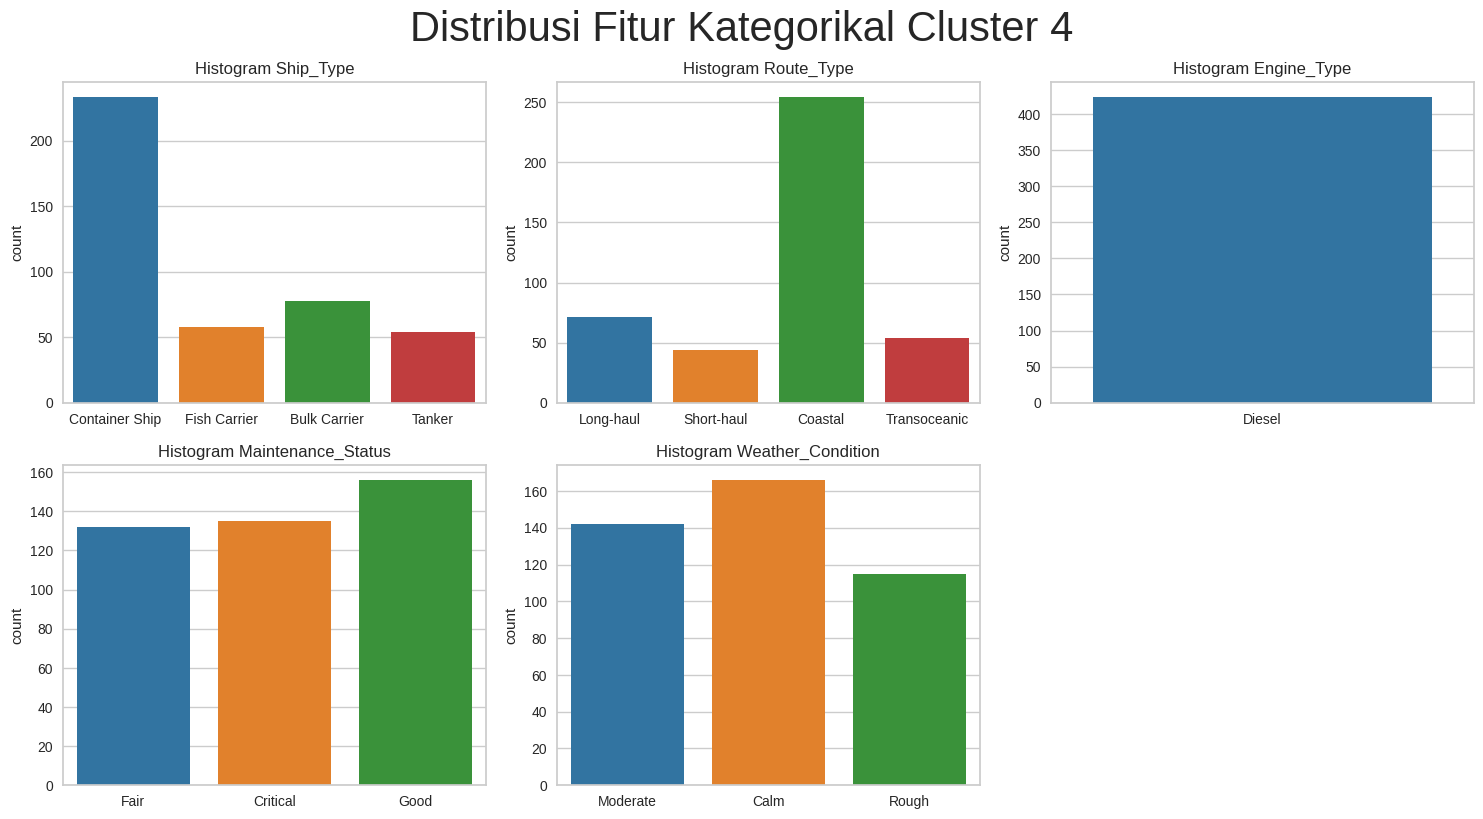

In [62]:
plt.figure(figsize=(15,12))

for i, iterate in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=iterate, data=df_cluster4, palette='tab10')
  plt.xlabel("")
  plt.title(f'Histogram {iterate}')
plt.suptitle('Distribusi Fitur Kategorikal Cluster 4', fontsize=30)
plt.tight_layout()
plt.show()

In [63]:
concat_stats = pd.concat([stats0, stats1, stats2, stats3, stats4], axis=1)


In [64]:
concat_stats_mean = concat_stats[['mean0', 'mean1', 'mean2', 'mean3', 'mean4']]
concat_stats_mean

,mean0,mean1,mean2,mean3,mean4
Speed_Over_Ground_knots,17.842726,17.457692,17.679243,17.525405,17.397694
Engine_Power_kW,1776.917212,1775.673668,1737.954373,1749.199047,1764.542380
Distance_Traveled_nm,1033.795570,1056.760865,1021.053521,1038.834980,1044.929732
Draft_meters,9.964202,9.890869,9.851602,9.985200,9.899815
Cargo_Weight_tons,994.998248,1006.844641,1046.455003,1049.922813,1046.308933
Operational_Cost_USD,258920.767625,256280.286304,258035.274695,254429.816350,246417.550402
Revenue_per_Voyage_USD,517536.811634,514488.036806,525379.045754,525933.081904,515921.944294
Turnaround_Time_hours,41.274072,41.487003,41.496608,42.216328,41.985771
Weekly_Voyage_Count,4.826377,4.905512,5.066116,4.916959,4.825059
Average_Load_Percentage,74.897294,73.827059,74.991265,75.578765,76.110355


In [65]:
concat_stats_std = concat_stats[['std0', 'std1', 'std2', 'std3', 'std4']]
concat_stats_std

,std0,std1,std2,std3,std4
Speed_Over_Ground_knots,4.252714,4.312084,4.227138,4.475458,4.178613
Engine_Power_kW,728.434476,721.854110,727.002754,706.511056,706.718658
Distance_Traveled_nm,575.017286,604.596543,556.664173,560.481564,572.695646
Draft_meters,2.832861,2.799678,2.919762,2.899407,2.884297
Cargo_Weight_tons,560.210859,574.256805,564.079474,549.378663,557.587364
Operational_Cost_USD,140667.043248,146394.005844,139708.539402,143436.232365,134458.336854
Revenue_per_Voyage_USD,270710.465247,283528.484091,269181.881786,269708.561291,271316.004477
Turnaround_Time_hours,18.057390,17.749581,17.460674,17.501317,17.522272
Weekly_Voyage_Count,2.624156,2.719954,2.534972,2.586468,2.598329
Average_Load_Percentage,14.722615,14.093584,14.716020,14.556189,14.039938


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - Sebagian besar merupakan kapal Bulk Carrier. Hal ini sejalan dengan data pada mean0 yang menunjukkan ada kesesuaian, seperti daya mesin tinggi, biaya operasional besar, dan pendapatan yang diperoleh daripada cluster lainnya.
  - Kapal besar seringkali menunda pemeliharaan untuk menghindari gangguan operasional yang ditunjukkan tingginya status pemeliharaan Critical.
  - Tingginya standar deviasi pada jarak yang ditempuh menunjukkan ada keberagaman jarak rute yang ditempuh.
2. Cluster 1:
  - Semua kapal menggunakan HFO dan rute Long-haul yang mana ada kesesuaian karena perjalanan jarak jauh biasanya menggunakan HFO untuk efisiensi biaya bahan bakar.
  - Rata-rata kecepatan sekitar 17.46 knots dan rata-rata muatan 1006.84. Berarti cluster ini memiliki muatan yang cukup besar dan tidak berkecepatan tinggi karena merupakan kapal Bulk-Carrier atau Tanker.
  - Rata-rata waktu bongkar muatan sekitar 41.49 jam yang menunjukkan cukup lama. Hal ini memungkinkan karena adanya muatan yang cukup besar.
3. Cluster 2:
  - Rata-rata bobot kargo 1046 ton, rata-rata daya mesin 1737 kW yang sesuai untuk kapal berukuran menengah hingga besar. Hal ini sesuai dengan bahwa jenis kapal didominasi oleh Bulk Carrier dan Tanker.
  - Sebagian besar beroperasi dalam rute Long-haul yang sesuai untuk kapal besar yang mengangkut barang dalam jumlah besar. Hal ini juga didukung berdasarkan jarak tempuh rata-rata 1021 nm.
  - Mesin yang digunakan berupa Diesel karena mesin ini lebih efisien dibandingkan yang lain untuk perjalnan panjang.
  - Rata-rata pendapatan dan biaya operasinal setiap perjalanan berturut-turut \$525,379 dan \$258,035. Ini berarti profit yang diperoleh setiap perjalanan cukup besar sehingga pada cluster ini menerima profit yang cukup tinggi.
4. Cluster 3:
  - Cluster ini menggunakan mesin Steam Turbine yang umumnya digunakan untuk kapal berkebutuhan daya besar dan efisiensi bahan bakar dalam perjalanan jauh. Hal ini juga didukung oleh rute berupa Long-haul dan Transoceanic.
  - Rata-rata kecepatan 17.5 knot yang cukup efisien untuk menghemat bahan bakar di perjalanan panjang. Ini juga bersesuaian dengan dengan berat kargo 1050 ton yang merupakan kapal kargo besar.
  - Pendapatan dan biaya operasional berturut-turut sekitar  \$525.000 dan \$254.000. Kapal dalam cluster ini memiliki keuntungan meskipun biaya operasional tinggi.
5. Cluster 4:
 - Didominasi oleh kapal kontainer yang bersesuaian dengan mayoritas rute adalah Costal dan kecepatannya 17.4 knot.
 - Rata-rata beban muatan 1046 ton dan Load Percentage 76% menunjukkan efisiensi pemanfaatan kapasitas yang cukup baik.
 - Frekuensi perjalanan cukup tinggi, yaitu 4.8 kali per minggu menunjukkan kesesuaian dengan pola operasional kapal niaga yang aktif.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
*Rata-Rata*
  - **Speed Over Ground (knots):** 17.84
  - **Engine Power (kW):** 1776.91
  - **Distance Traveled (nm):** 1033.79
  - **Draft (meters):** 9.96
  - **Cargo Weight (tons):** 994.99
  - **Operational Cost (USD):** 257920.76
  - **Revenue per Voyage (USD):** 517536.81
  - **Turnaround Time (hours):** 41.27
  - **Weekly Voyage:** 4.82
  - **Average Load (%):** 74.89

*Standar Deviasi*
  - **Speed Over Ground (knots):** 4.25
  - **Engine Power (kW):** 728.43
  - **Distance Traveled (nm):** 575.01
  - **Draft (meters):** 2.83
  - **Cargo Weight (tons):** 560.21
  - **Operational Cost (USD):** 140667.04
  - **Revenue per Voyage (USD):** 270710.46
  - **Turnaround Time (hours):** 18.05
  - **Weekly Voyage:** 2.62
  - **Average Load (%):** 14.72

**Analisis:** Karakteristik kapal dalam karakteristik ini memiliki daya mesin tinggi, jarak tempuh yang bervariasi, biaya operasional dan pendapatan signifikan, dan berfokus pada efisiensi muatan yang tinggi. Average load yang tinggi memiliki peluang untuk meningkatakan efisiensi dengan mengidentifikasi pola muatan yang belum maksimal. Pendapatan yang beragam menunjukkan cluster ini dapat beroperasi dalam berbagai kondisi pasar, dengan potensi pendapatan besar pada rute panjang. Dengan biaya operasional tinggi, mengidentifikasi rute dengan pola cuaca yang lebih stabil bisa mengurangi resiko penundaan dan meningkatkan keselamatan perjalanan. Cluster ini memiliki potensi untuk menarik pelanggan yang membutuhkan layanan angkutan besar.

## Cluster 1:

*Rata-Rata*
  - **Speed Over Ground (knots):** 17.45
  - **Engine Power (kW):** 1775.67
  - **Distance Traveled (nm):** 1056.76
  - **Draft (meters):** 9.89
  - **Cargo Weight (tons):** 1006.84
  - **Operational Cost (USD):** 256280.28
  - **Revenue per Voyage (USD):** 514488.03
  - **Turnaround Time (hours):** 41.27
  - **Weekly Voyage:** 4.90
  - **Average Load (%):** 73.82

*Standar Deviasi*
  - **Speed Over Ground (knots):** 4.31
  - **Engine Power (kW):** 721.85
  - **Distance Traveled (nm):** 604.59
  - **Draft (meters):** 2.79
  - **Cargo Weight (tons):** 574.25
  - **Operational Cost (USD):** 146394.00
  - **Revenue per Voyage (USD):** 283528.48
  - **Turnaround Time (hours):** 17.74
  - **Weekly Voyage:** 2.71
  - **Average Load (%):** 14.09

**Analisis:** Cluster ini terdiri dari kapal long-haul yang beroperasi dengan kecepatan tinggi (17.46 knots) dan bobot muatan sedang hingga tinggi (1006.84 tons). Kapal-kapal ini menggunakan Heavy Fuel Oil (HFO) dan memiliki biaya operasional yang cukup tinggi, tetapi juga menghasilkan pendapatan yang besar. Optimisasi keceepatan ke sekitar 16 knots dapat bengurangi biaya operasional. Cluster ini memiliki potensi besar dari segi profit jika menerapkan beberapa optimisasi seperti dalam bahan bakar dan peningkatan load factor.

## Cluster 2:
*Rata-Rata*
  - **Speed Over Ground (knots):** 17.67
  - **Engine Power (kW):** 1737.95
  - **Distance Traveled (nm):** 1021.05
  - **Draft (meters):** 9.85
  - **Cargo Weight (tons):** 1046.45
  - **Operational Cost (USD):** 258035.27
  - **Revenue per Voyage (USD):** 525379.04
  - **Turnaround Time (hours):** 41.49
  - **Weekly Voyage:** 5.06
  - **Average Load (%):** 74.99

*Standar Deviasi*
  - **Speed Over Ground (knots):** 4.22
  - **Engine Power (kW):** 727.00
  - **Distance Traveled (nm):** 556.66
  - **Draft (meters):** 2.91
  - **Cargo Weight (tons):** 564.07
  - **Operational Cost (USD):** 139708.88
  - **Revenue per Voyage (USD):** 269181.88
  - **Turnaround Time (hours):** 17.46
  - **Weekly Voyage:** 2.53
  - **Average Load (%):** 14.71

 **Analisis:** Cluster ini mencakup kapal dengan ukuran dan daya mesin yang beragam, namun cenderung memiliki performa stabil. Tipe kapal didominasi oleh Bulk Carrier dengan rute Long-haul menunjukkan cluster ini berupa kapal kargo besar yang beroperasi dengan jarak jauh. Hal ini ditunjukkan pula dari penggunaan mesin Diesel sebagai efisiensi untuk perjalanan jangka panjang. Cluster ini berpotensi untuk perusahaan yang melayani ekspor-uimpor berskala besar.

 ## Cluster 3:
*Rata-Rata*
  - **Speed Over Ground (knots):** 17.52
  - **Engine Power (kW):** 1749.19
  - **Distance Traveled (nm):** 1038.83
  - **Draft (meters):** 9.98
  - **Cargo Weight (tons):** 1049.92
  - **Operational Cost (USD):** 254429.81
  - **Revenue per Voyage (USD):** 525933.08
  - **Turnaround Time (hours):** 42.21
  - **Weekly Voyage:** 4.91
  - **Average Load (%):** 75.57

*Standar Deviasi*
  - **Speed Over Ground (knots):** 4.47
  - **Engine Power (kW):** 706.51
  - **Distance Traveled (nm):** 560.48
  - **Draft (meters):** 2.89
  - **Cargo Weight (tons):** 549.37
  - **Operational Cost (USD):** 143436.23
  - **Revenue per Voyage (USD):** 269708.56
  - **Turnaround Time (hours):** 17.50
  - **Weekly Voyage:** 2.58
  - **Average Load (%):** 14.55

 **Analisis:** Cluster ini mencakup kapal dengan fungsi berbeda namun memiliki kesamaan seperti menggunakan Steam-Turbine yang merupakan pembeda dengan cluster lainnya. Sebagian besar beroperasi pada rute Long-haul dan Transoceanic (jarak jauh), bersesuaian dengan kapal tenaga besar cenderung menempuh perjalanan jauh. Biaya operasional yang tinggi, namun juga memiliki pendapatan tinggi per perjalanan.

  ## Cluster 4:
*Rata-Rata*
  - **Speed Over Ground (knots):** 17.39
  - **Engine Power (kW):** 1764.54
  - **Distance Traveled (nm):** 1044.92
  - **Draft (meters):** 9.89
  - **Cargo Weight (tons):** 1046.30
  - **Operational Cost (USD):** 246417.55
  - **Revenue per Voyage (USD):** 515921.94
  - **Turnaround Time (hours):** 41.98
  - **Weekly Voyage:** 4.82
  - **Average Load (%):** 76.11

*Standar Deviasi*
  - **Speed Over Ground (knots):** 4.17
  - **Engine Power (kW):** 706.71
  - **Distance Traveled (nm):** 572.69
  - **Draft (meters):** 2.88
  - **Cargo Weight (tons):** 557.58
  - **Operational Cost (USD):** 134458.33
  - **Revenue per Voyage (USD):** 271316.00
  - **Turnaround Time (hours):** 17.52
  - **Weekly Voyage:** 2.59
  - **Average Load (%):** 14.03

 **Analisis:** Cluster ini didominasi oleh kapal container ship yang berperan penting pada variasi kapasitas kargo, biaya operasional, dan pendapatan yang cukup besar. Mayoritas kapal menggunakan mesin diesel menunjukkan cluster ini cenderung lebih standar dalam pemilihan mesin serta rute Costal karena jarak tempuh yang tidak terlalu jauh dengan frekuensi pelayanan cukup tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [66]:
df_cluster.to_csv('Data_clustering.csv', index=False)